### intro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = ('/content/drive/MyDrive/letter-recognition.csv')
data = pd.DataFrame(pd.read_csv(filepath))

data.head(5)

Mounted at /content/drive


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvy
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
#split features + target

y = data.letter
x_data = data.drop('letter', axis=1)
#x_data.head()
#y.head()

#normalize the data to scale from 0 to 1:
x = (x_data - np.min(x_data, axis = 0)) / (np.max(x_data, axis = 0) - np.min(x_data, axis = 0))
x.head(5)

print(x_data.describe())
print()
print(x.describe())


              x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

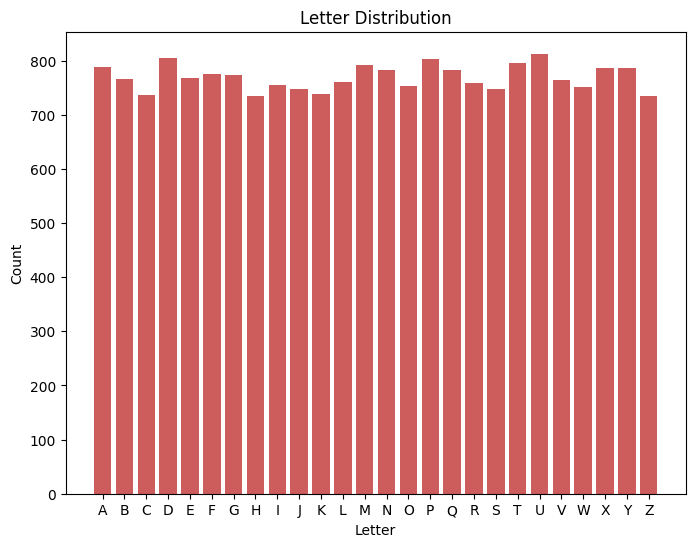

In [ ]:
count = y.value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(count.index, count.values, color = 'indianred')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Letter Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)
print("x training data shape:")
print("",x_train.shape)
print("y training data shape:")
print("",y_train.shape)
print("x testing data shape:")
print("",x_test.shape)
print("y testing data shape:")
print("",y_test.shape)

x training data shape:
 (16000, 16)
y training data shape:
 (16000,)
x testing data shape:
 (4000, 16)
y testing data shape:
 (4000,)


### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#instantiate the LogisticRegression model:
lr = LogisticRegression(max_iter=2000)

#train it:

lol1 = lr.fit(x_train,y_train)
lr_predictions = lr.predict(x_test)

#calculate the score when predicting the test data:
lr_accuracy = lr.score(x_test,y_test)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.74925


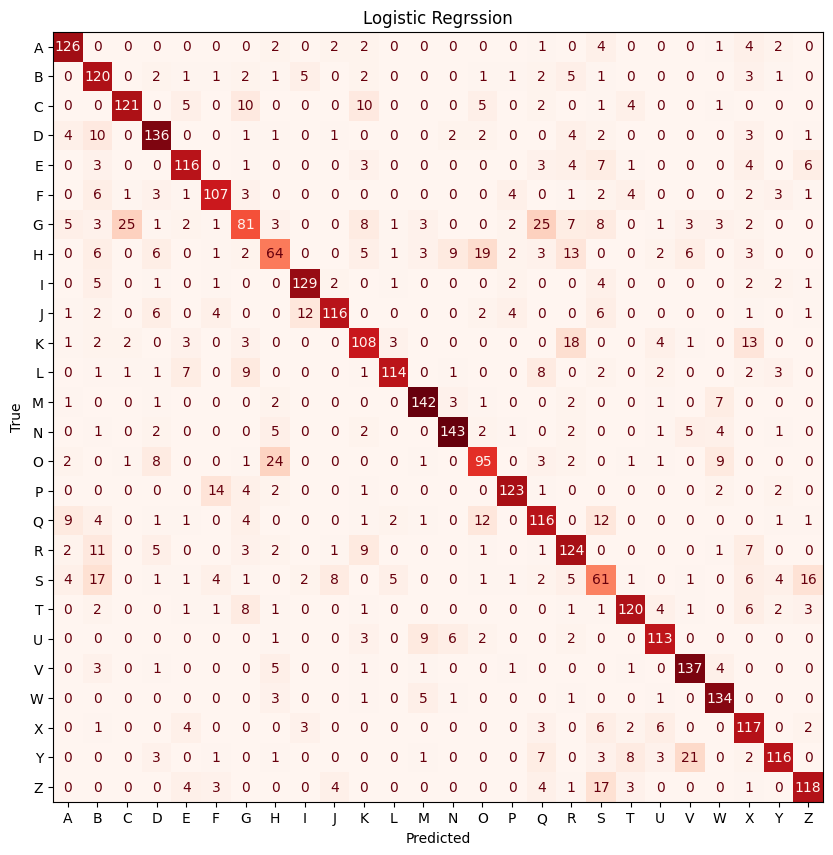

In [ ]:
#confusion matrix

lr_y_pred = lr.predict(x_test)

logistic_matrix = confusion_matrix(y_test, lr_y_pred)

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the values as needed

disp = ConfusionMatrixDisplay(logistic_matrix, display_labels=lr.classes_)
disp.plot(ax=ax, cmap="Reds")
plt.title("Logistic Regrssion")
plt.xlabel('Predicted')
plt.ylabel('True')
disp.im_.colorbar.remove()
plt.show()


'\n#indiv\n\nfig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots\nfig.suptitle("Decision Tree ROC Curves for Each Letter", fontsize=16)\n\n# Plot individual letter ROC curves\nfor i, ax in enumerate(axes.ravel()):\n    if i < n_classes_lr:\n        ax.plot(fpr_lr[i], tpr_lr[i], color=\'indianred\', lw=2,\n                label=\'ROC curve (area = %0.2f)\' % roc_auc_lr[i])\n        ax.plot([0, 1], [0, 1], color=\'indigo\', lw=2, linestyle=\'--\')\n        ax.set_xlim([0.0, 1.0])\n        ax.set_ylim([0.0, 1.05])\n        ax.set_xlabel(\'False Positive Rate\', fontsize=9, labelpad=5)\n        ax.set_ylabel(\'True Positive Rate\', fontsize=9, labelpad=5)\n        ax.set_title(f"Letter: {np.unique(y)[i]}")\n        ax.legend(loc="lower right", fontsize=9)\n        ax.tick_params(axis=\'both\', which=\'major\', labelsize=8)  # Adjust tick label size\n\n    else:\n        ax.axis(\'off\')\n\nplt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout paddin

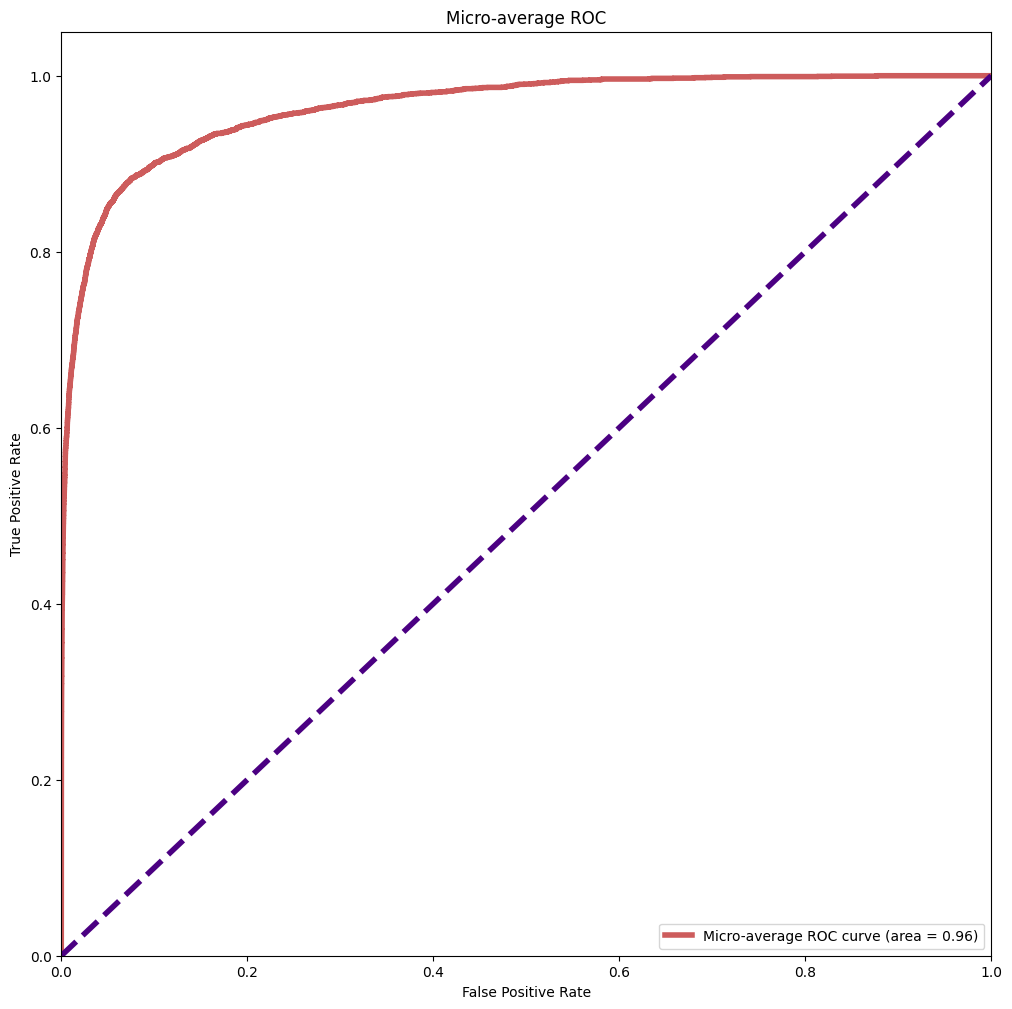

In [ ]:

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes_lr = y_test_bin.shape[1]


classifier = OneVsRestClassifier(LogisticRegression(max_iter=2000))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes_lr):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Compute micro-average ROC curve and ROC area
fpr_lr["micro"], tpr_lr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_lr["micro"] = auc(fpr_lr["micro"], tpr_lr["micro"])

fig, ax = plt.subplots(figsize=(12,12))  # Create a single subplot

ax.plot(fpr_lr["micro"], tpr_lr["micro"], color='indianred', lw=4,
        label='Micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc_lr["micro"]))
ax.plot([0, 1], [0, 1], color='indigo', lw=4, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Micro-average ROC')
ax.legend(loc="lower right")
'''
#indiv

fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots
fig.suptitle("Decision Tree ROC Curves for Each Letter", fontsize=16)

# Plot individual letter ROC curves
for i, ax in enumerate(axes.ravel()):
    if i < n_classes_lr:
        ax.plot(fpr_lr[i], tpr_lr[i], color='indianred', lw=2,
                label='ROC curve (area = %0.2f)' % roc_auc_lr[i])
        ax.plot([0, 1], [0, 1], color='indigo', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=9, labelpad=5)
        ax.set_ylabel('True Positive Rate', fontsize=9, labelpad=5)
        ax.set_title(f"Letter: {np.unique(y)[i]}")
        ax.legend(loc="lower right", fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label size

    else:
        ax.axis('off')

plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout padding
plt.show()
'''

### svm

In [ ]:
#svm

from sklearn import svm
from sklearn.metrics import accuracy_score

svm = svm.SVC()
svm.fit(x_train, y_train)
svm_predictions = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.92525


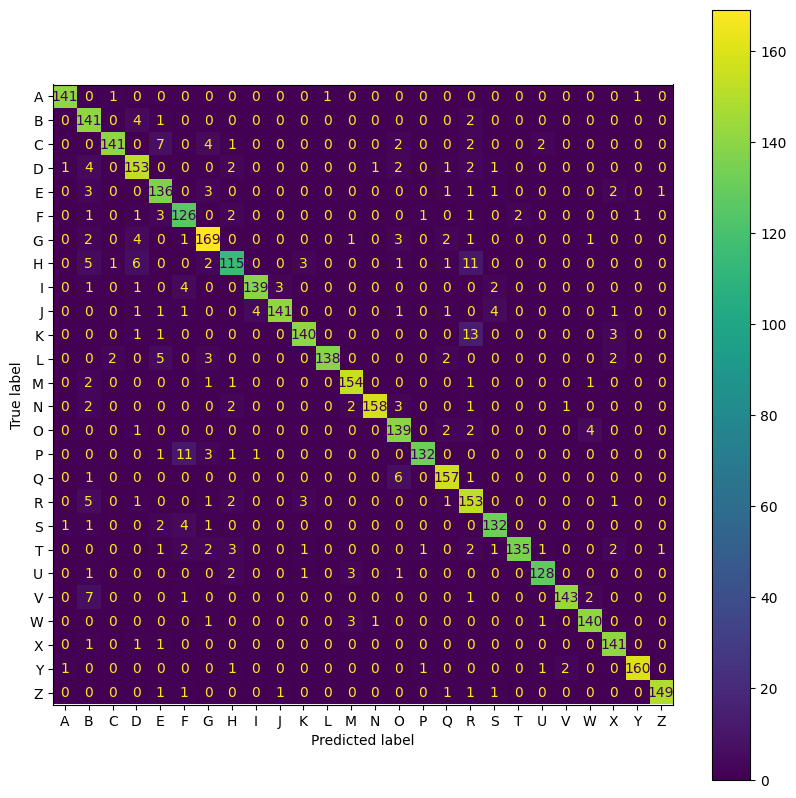

In [ ]:
#svm confusion matrix

svm_y_pred = svm.predict(x_test)

svm_matrix = confusion_matrix(y_test, svm_y_pred)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(svm_matrix, display_labels=svm.classes_)
disp.plot(ax=ax)
plt.show()

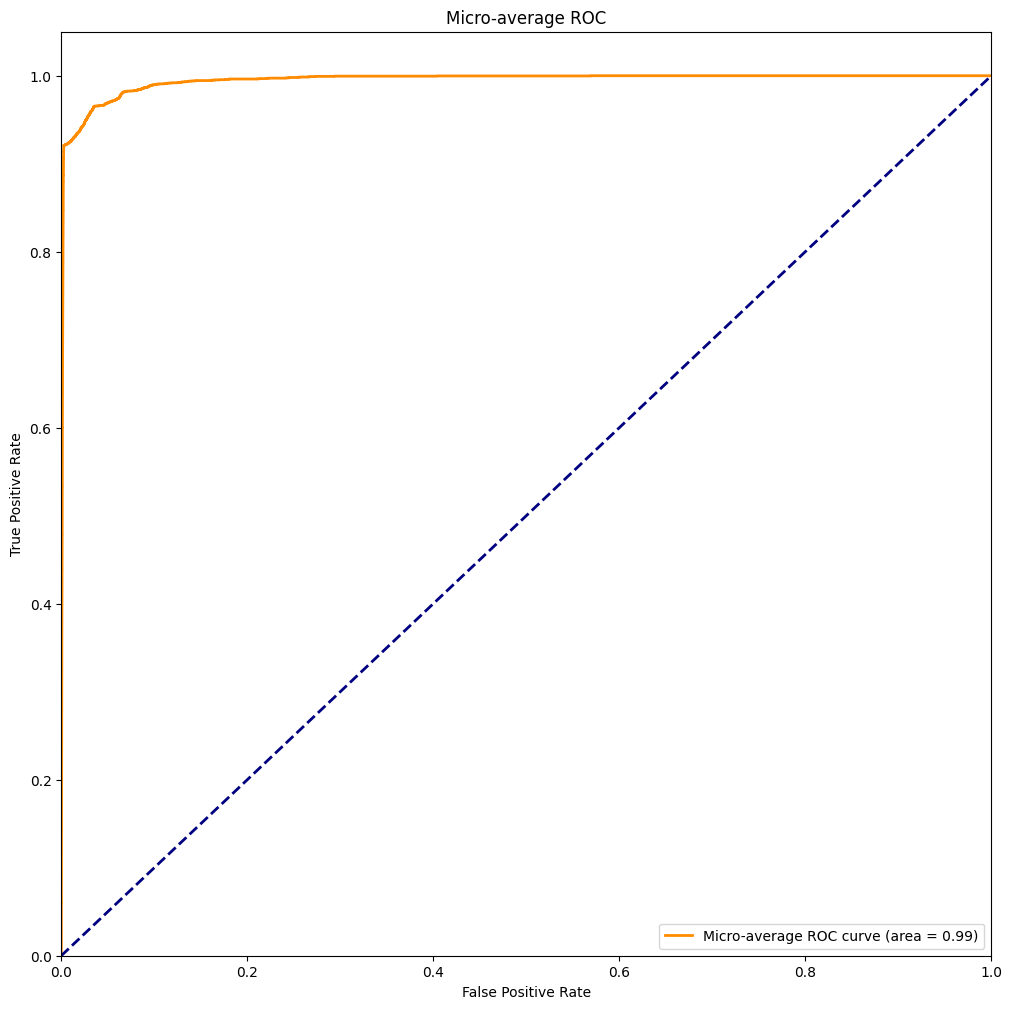

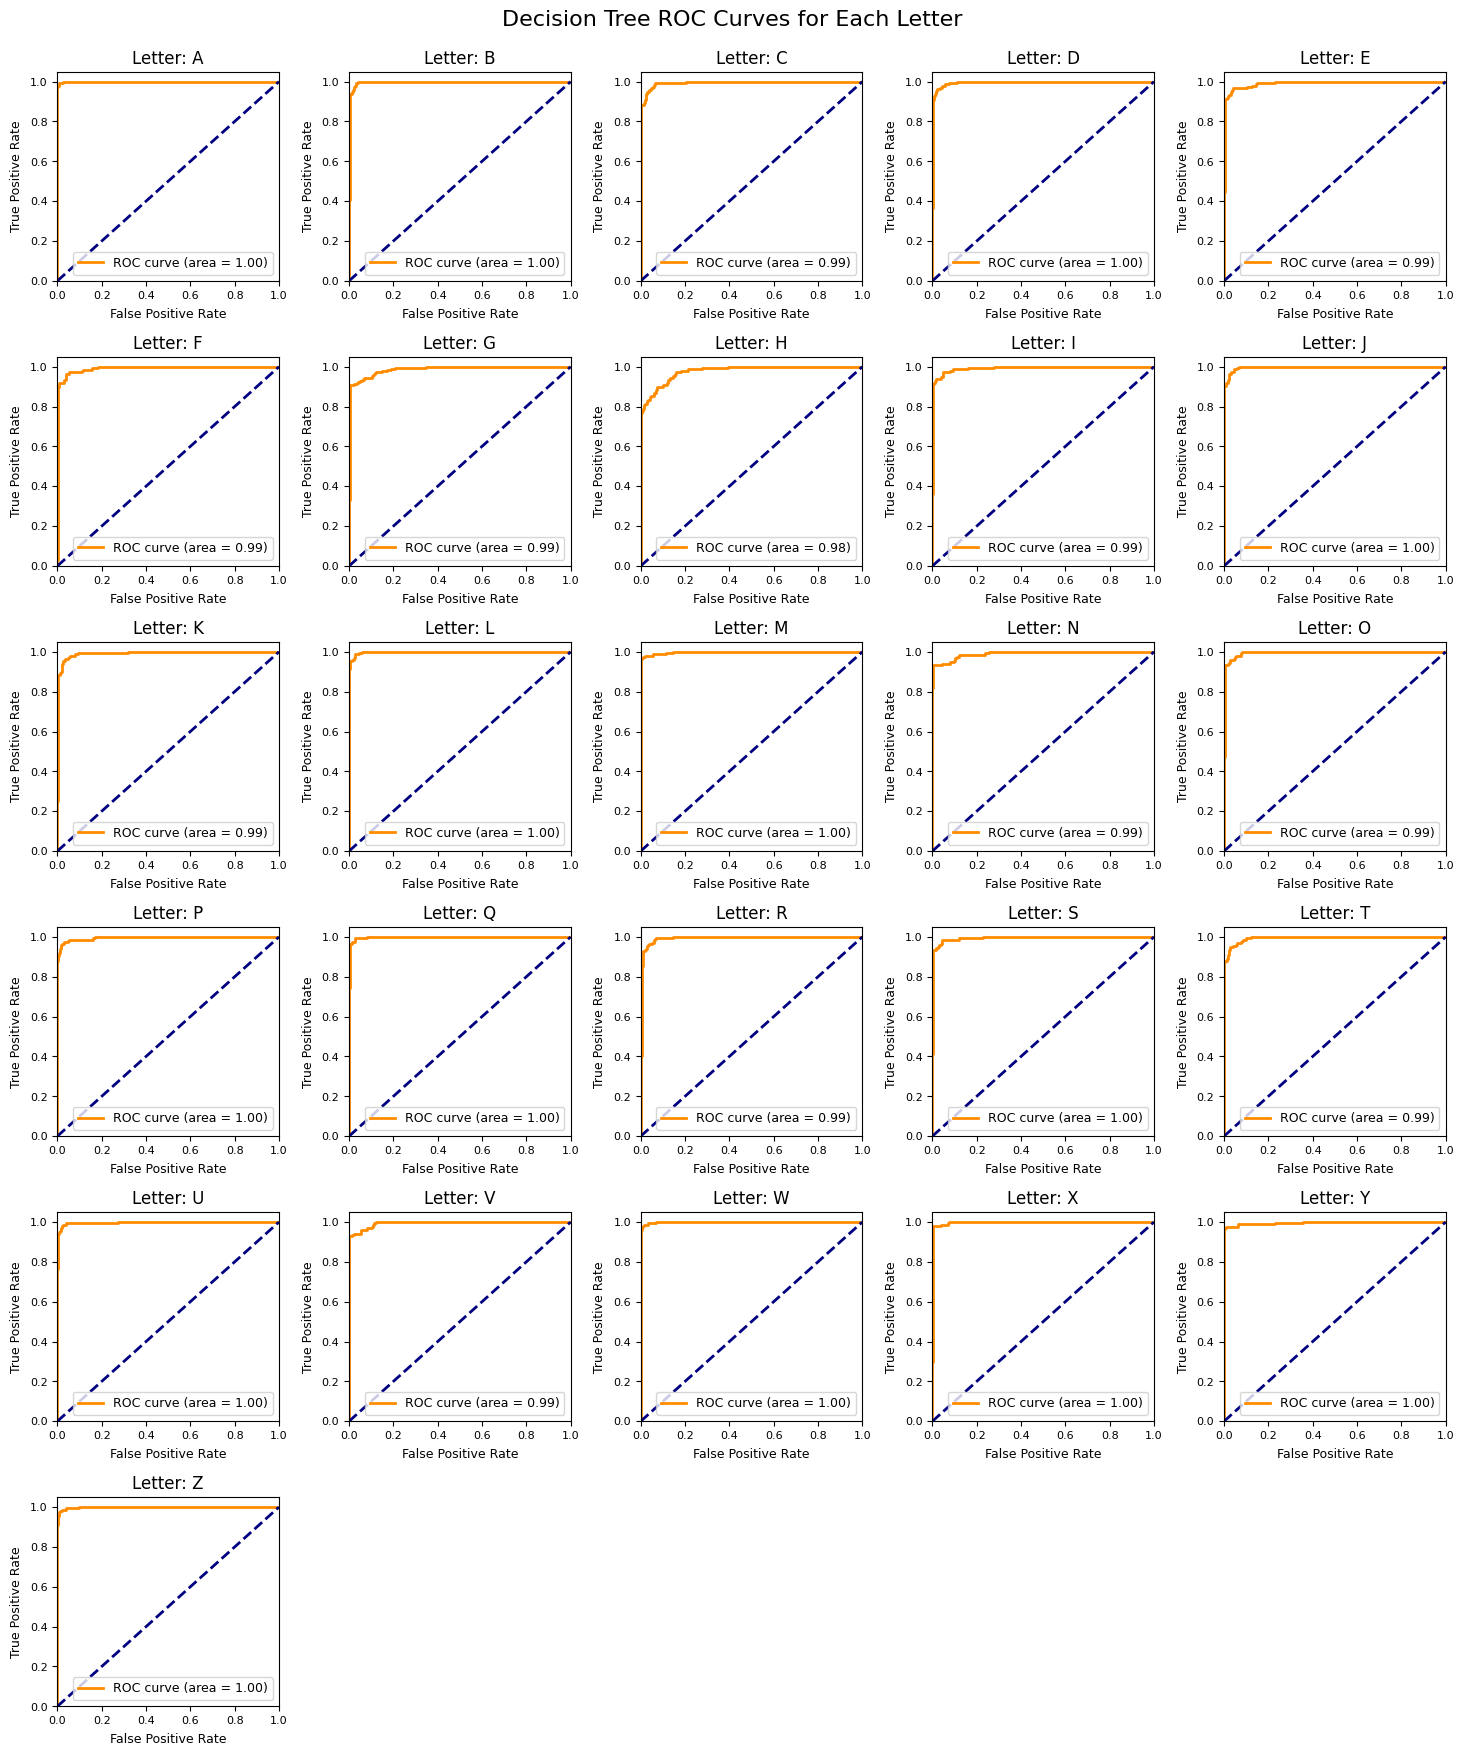

In [ ]:

y_test_bin_svm = label_binarize(y_test, classes=np.unique(y))
n_classes_svm = y_test_bin_svm.shape[1]


y_score_svm = svm.decision_function(x_test)

fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes_svm):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin_svm[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Compute micro-average ROC curve and ROC area for SVM
fpr_svm["micro"], tpr_svm["micro"], _ = roc_curve(y_test_bin_svm.ravel(), y_score_svm.ravel())
roc_auc_svm["micro"] = auc(fpr_svm["micro"], tpr_svm["micro"])

fig, ax = plt.subplots(figsize=(12,12))

ax.plot(fpr_svm["micro"], tpr_svm["micro"], color='darkorange', lw=2,
        label='Micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc_svm["micro"]))
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Micro-average ROC')
ax.legend(loc="lower right")

#indiv

fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots
fig.suptitle("Decision Tree ROC Curves for Each Letter", fontsize=16)

# Plot individual letter ROC curves
for i, ax in enumerate(axes.ravel()):
    if i < n_classes_svm:
        ax.plot(fpr_svm[i], tpr_svm[i], color='darkorange', lw=2,
                label='ROC curve (area = %0.2f)' % roc_auc_svm[i])
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=9, labelpad=5)
        ax.set_ylabel('True Positive Rate', fontsize=9, labelpad=5)
        ax.set_title(f"Letter: {np.unique(y)[i]}")
        ax.legend(loc="lower right", fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label size

    else:
        ax.axis('off')

plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout padding
plt.show()

### random forest

In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier(n_estimators=1000, random_state=45)
forest_model.fit(x_train, y_train)
rf_predictions = forest_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)


print("Random Forest Accuracy:", rf_accuracy)


#0.963, 100
#0.96675, 200
#0.96725, 500
#0.96775, 1000
#0.9680, 2000
#0.9685, 5000
#0.9683, 7000

Random Forest Accuracy: 0.96775


Text(0, 0.5, 'Accuracy')

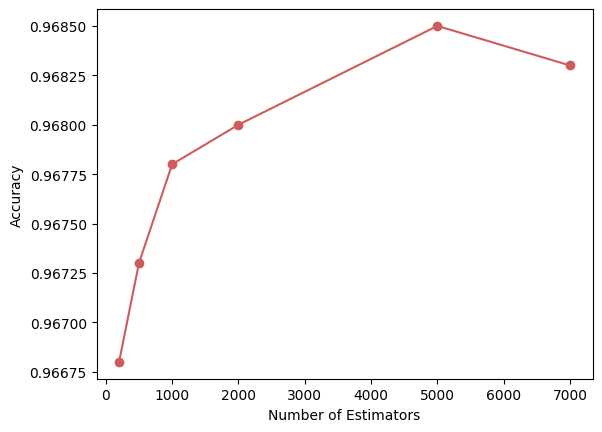

In [ ]:
n_estimators = [200, 500, 1000, 2000, 5000, 7000]
accuracies = [0.9668, 0.9673, 0.9678, 0.9680, 0.9685, 0.9683]

plt.plot(n_estimators, accuracies, marker='o', color = 'indianred')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

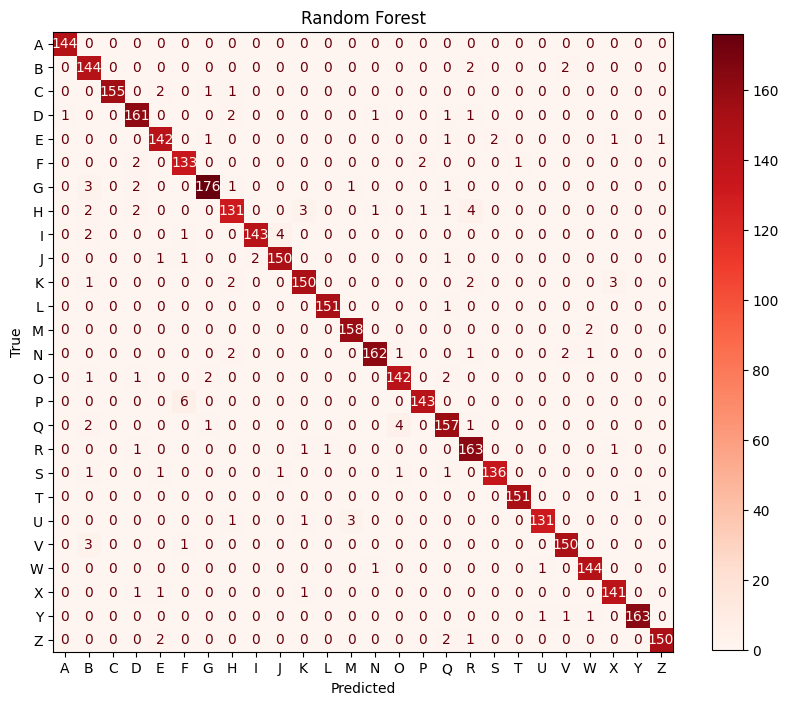

In [ ]:
#random forest confusion matrix

rf_y_pred = forest_model.predict(x_test) #to compare with y_test...

rf_matrix = confusion_matrix(y_test, rf_y_pred)


fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(rf_matrix, display_labels=lr.classes_)
disp.plot(ax=ax, cmap="Reds")
plt.title("Random Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
disp.im_.colorbar.remove()


plt.colorbar(disp.im_, shrink=0.8, aspect=20)

plt.show()

'\n#indiv\n\nfig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots\nfig.suptitle("Random Forest ROC Curves for Each Letter", fontsize=16)\n\n# Plot individual letter ROC curves\nfor i, ax in enumerate(axes.ravel()):\n    if i < n_classes_rf:\n        ax.plot(fpr_rf[i], tpr_rf[i], color=\'darkorange\', lw=2,\n                label=\'ROC curve (area = %0.2f)\' % roc_auc_rf[i])\n        ax.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\n        ax.set_xlim([0.0, 1.0])\n        ax.set_ylim([0.0, 1.05])\n        ax.set_xlabel(\'False Positive Rate\', fontsize=9, labelpad=5)\n        ax.set_ylabel(\'True Positive Rate\', fontsize=9, labelpad=5)\n        ax.set_title(f"Letter: {np.unique(y)[i]}")\n        ax.legend(loc="lower right", fontsize=9)\n        ax.tick_params(axis=\'both\', which=\'major\', labelsize=8)  # Adjust tick label size\n\n    else:\n        ax.axis(\'off\')\n\nplt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout padding

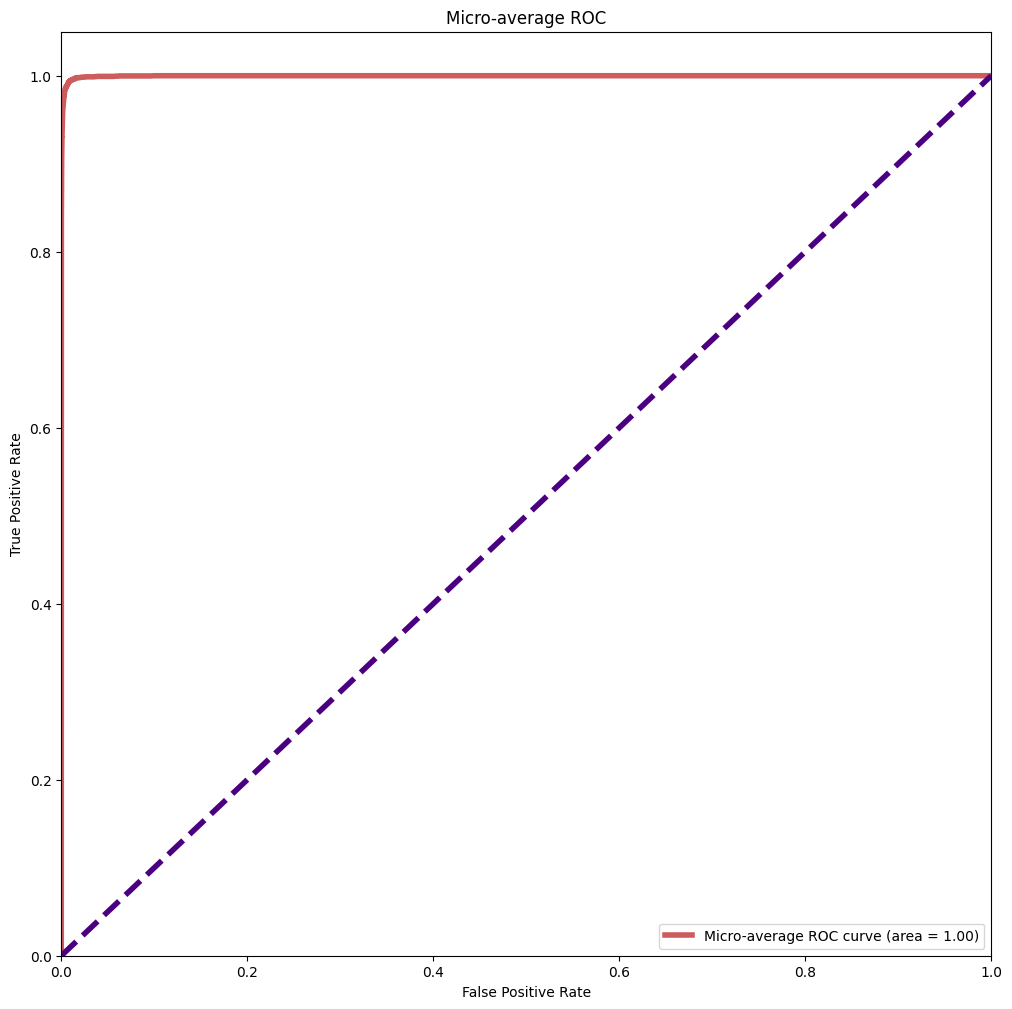

In [ ]:

y_test_bin_rf = label_binarize(y_test, classes=np.unique(y))
n_classes_rf = y_test_bin_rf.shape[1]

y_score_rf = forest_model.predict_proba(x_test)

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin_rf[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute micro-average ROC curve and ROC area for rf
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_bin_rf.ravel(), y_score_rf.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

fig, ax = plt.subplots(figsize=(12,12))  # Create a single subplot

ax.plot(fpr_rf["micro"], tpr_rf["micro"], color='indianred', lw=4,
        label='Micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc_rf["micro"]))
ax.plot([0, 1], [0, 1], color='indigo', lw=4, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Micro-average ROC')
ax.legend(loc="lower right")


'''
#indiv

fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots
fig.suptitle("Random Forest ROC Curves for Each Letter", fontsize=16)

# Plot individual letter ROC curves
for i, ax in enumerate(axes.ravel()):
    if i < n_classes_rf:
        ax.plot(fpr_rf[i], tpr_rf[i], color='darkorange', lw=2,
                label='ROC curve (area = %0.2f)' % roc_auc_rf[i])
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=9, labelpad=5)
        ax.set_ylabel('True Positive Rate', fontsize=9, labelpad=5)
        ax.set_title(f"Letter: {np.unique(y)[i]}")
        ax.legend(loc="lower right", fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label size

    else:
        ax.axis('off')

plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout padding
plt.show()
'''

### decision tree

In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.873


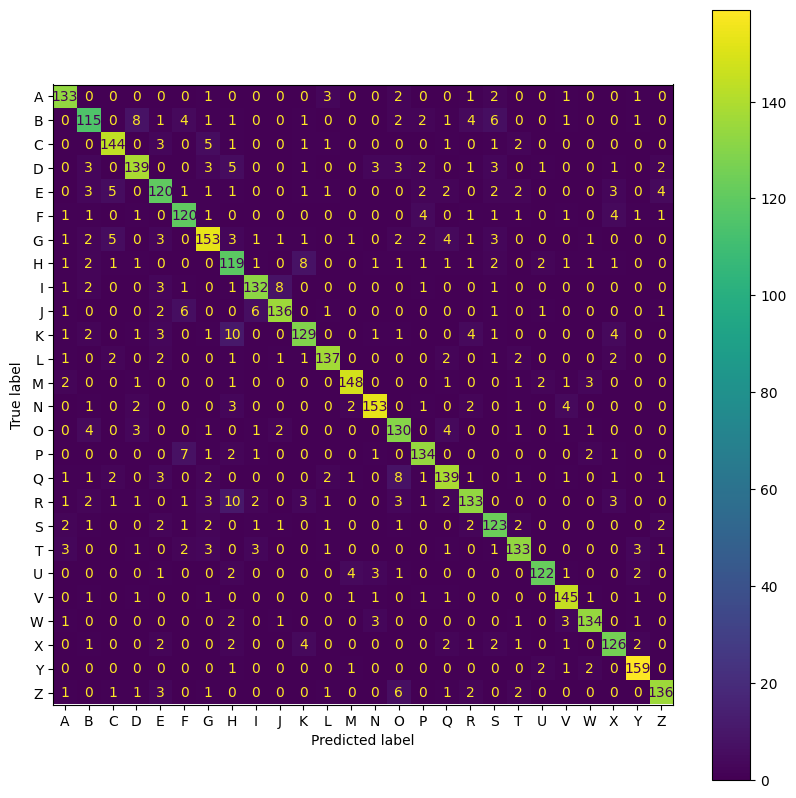

In [ ]:
dt_y_pred = dt_model.predict(x_test)

dt_matrix = confusion_matrix(y_test, dt_y_pred)

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the values as needed

disp = ConfusionMatrixDisplay(dt_matrix, display_labels=lr.classes_)
disp.plot(ax=ax)
plt.show()

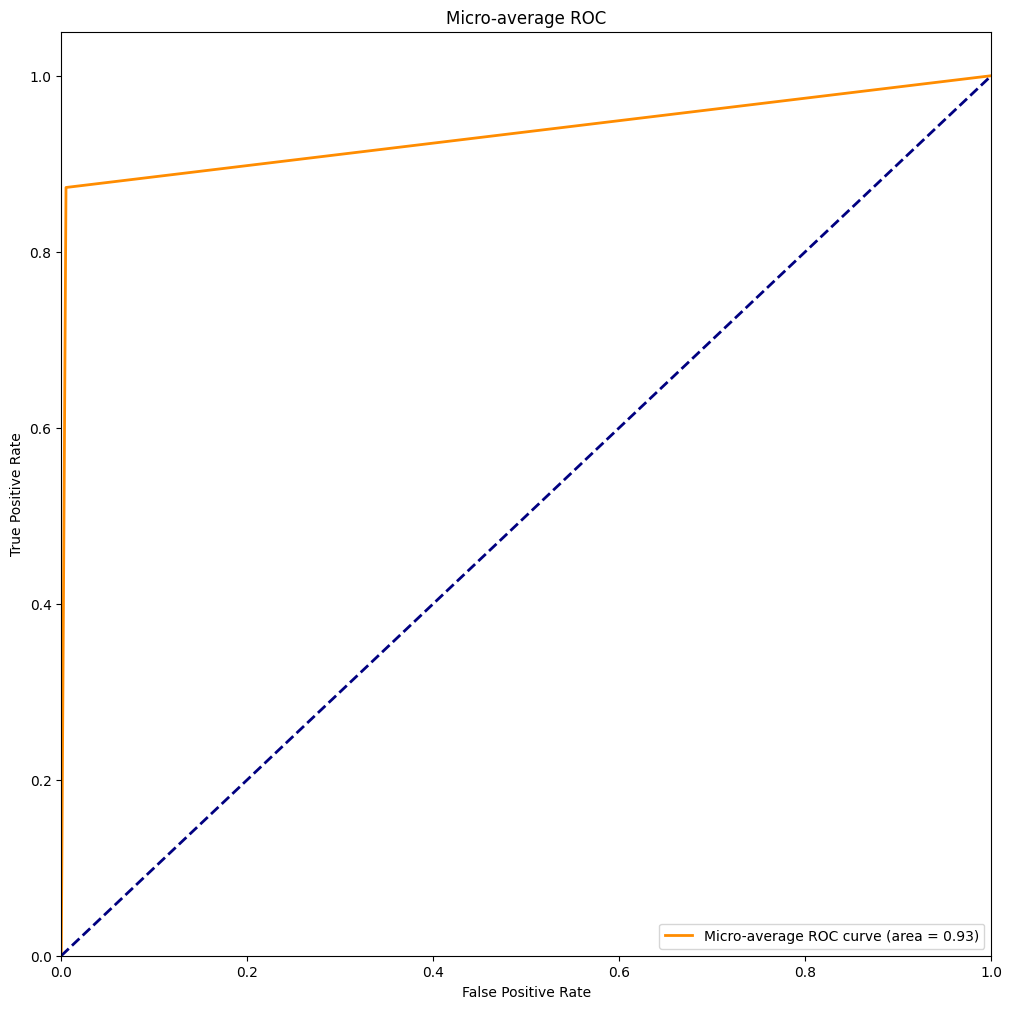

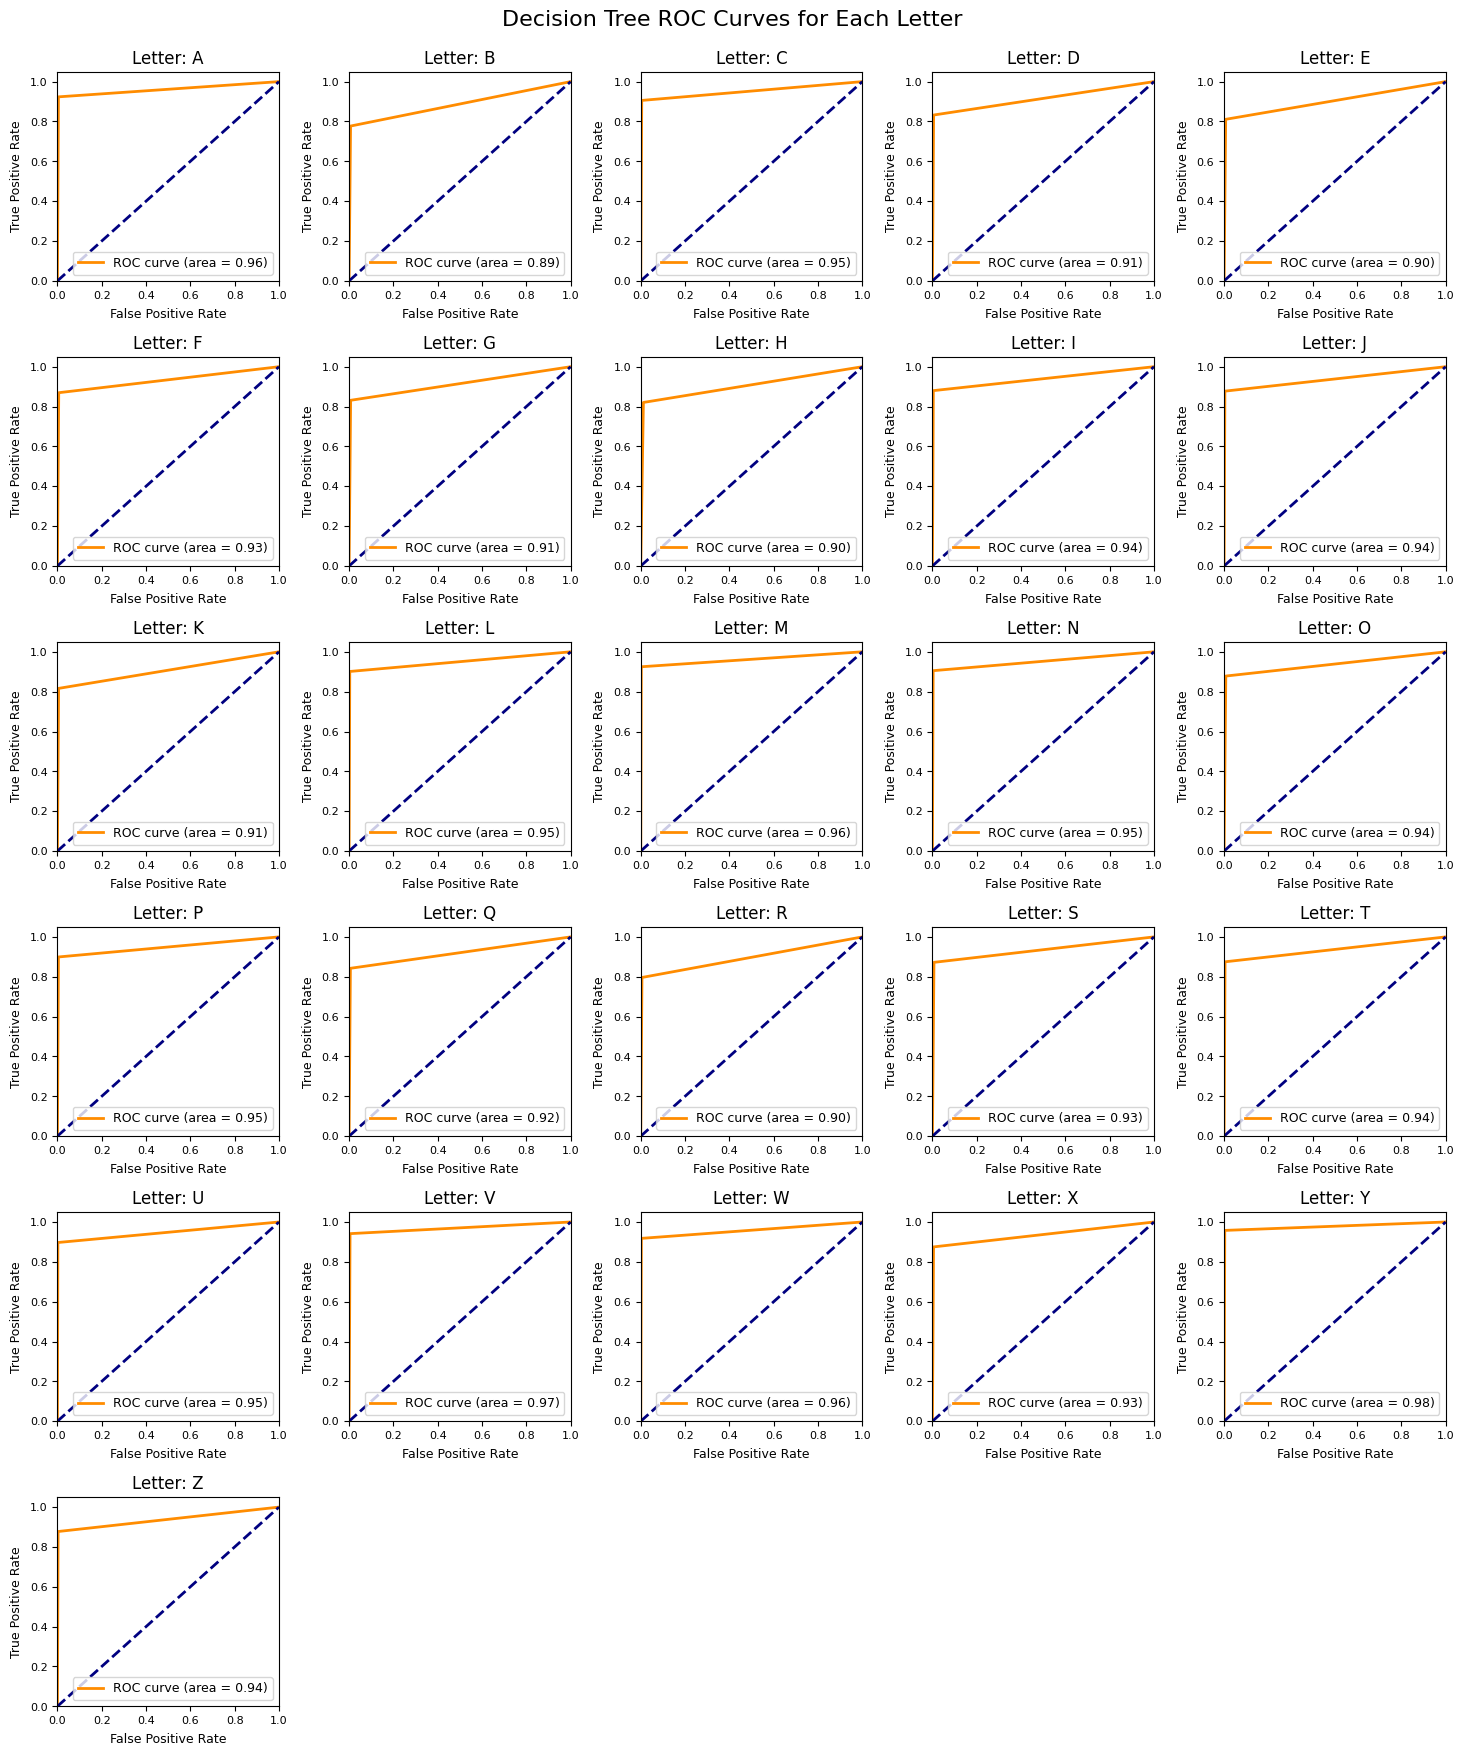

In [ ]:
y_test_bin_dt = label_binarize(y_test, classes=np.unique(y))
n_classes_dt = y_test_bin_rf.shape[1]

y_score_dt = dt_model.predict_proba(x_test)

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes_dt):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin_dt[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute micro-average ROC curve and ROC area for SVM
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_bin_dt.ravel(), y_score_dt.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

fig, ax = plt.subplots(figsize=(12,12))  # Create a single subplot

ax.plot(fpr_dt["micro"], tpr_dt["micro"], color='darkorange', lw=2,
        label='Micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc_dt["micro"]))
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Micro-average ROC')
ax.legend(loc="lower right")

#indiv

fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots
fig.suptitle("Decision Tree ROC Curves for Each Letter", fontsize=16)

# Plot individual letter ROC curves
for i, ax in enumerate(axes.ravel()):
    if i < n_classes_dt:
        ax.plot(fpr_dt[i], tpr_dt[i], color='darkorange', lw=2,
                label='ROC curve (area = %0.2f)' % roc_auc_dt[i])
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=9, labelpad=5)
        ax.set_ylabel('True Positive Rate', fontsize=9, labelpad=5)
        ax.set_title(f"Letter: {np.unique(y)[i]}")
        ax.legend(loc="lower right", fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label size

    else:
        ax.axis('off')

plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout padding
plt.show()

### mlp


In [ ]:
# mlp

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(2000,), max_iter=1000) # fix hidden_layer_sizes and other parameters as needed

mlp.fit(x_train, y_train)

mlp_predictions = mlp.predict(x_test)

mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)

#0.9663, 10000
#0.9683, 7500
#0.9705, 5000
#0.9703, 2000
#0.9663, 1000
#0.9663, 500
#0.9550, 400
#0.9493, 200
#0.8943, 45
#0.8758, 36

# higher hidden layer = more accurate

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP Accuracy: 0.964


Text(0, 0.5, 'Accuracy')

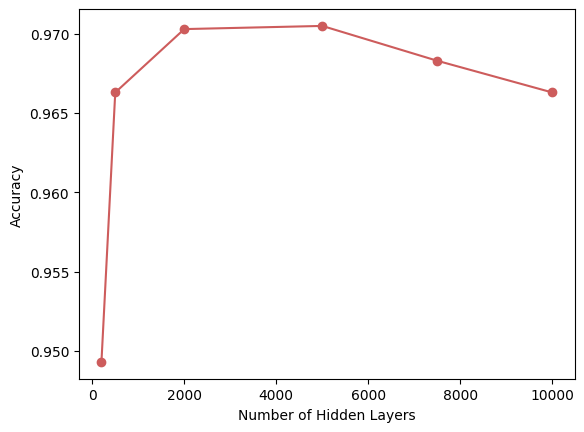

In [ ]:
hidden_layers = [200, 500, 2000, 5000, 7500, 10000]
accuracies = [0.9493, 0.9663, 0.9703, 0.9705, 0.9683, 0.9663]

plt.plot(hidden_layers, accuracies, marker='o', color = 'indianred')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')

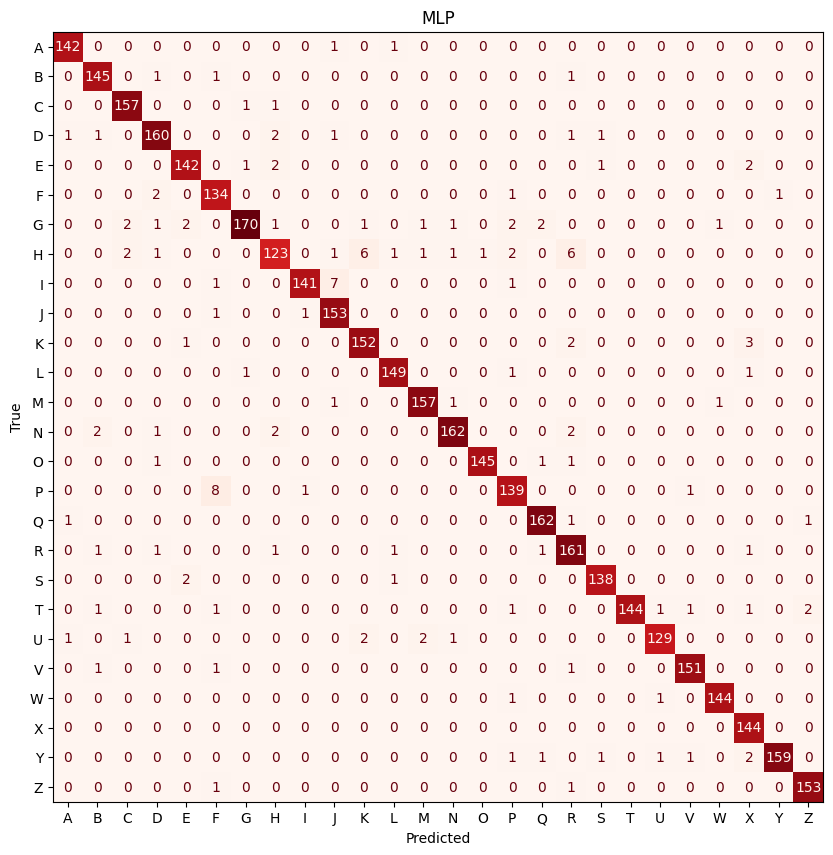

In [ ]:
mlp_y_pred = mlp.predict(x_test)

mlp_matrix = confusion_matrix(y_test, mlp_y_pred)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(mlp_matrix, display_labels=lr.classes_)
disp.plot(ax=ax, cmap="Reds")
plt.title("MLP")
plt.xlabel('Predicted')
plt.ylabel('True')
disp.im_.colorbar.remove()
plt.show()

'\n#indiv\n\nfig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots\nfig.suptitle("Decision Tree ROC Curves for Each Letter", fontsize=16)\n\n# Plot individual letter ROC curves\nfor i, ax in enumerate(axes.ravel()):\n    if i < n_classes_mlp:\n        ax.plot(fpr_mlp[i], tpr_mlp[i], color=\'darkorange\', lw=2,\n                label=\'ROC curve (area = %0.2f)\' % roc_auc_mlp[i])\n        ax.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\n        ax.set_xlim([0.0, 1.0])\n        ax.set_ylim([0.0, 1.05])\n        ax.set_xlabel(\'False Positive Rate\', fontsize=9, labelpad=5)\n        ax.set_ylabel(\'True Positive Rate\', fontsize=9, labelpad=5)\n        ax.set_title(f"Letter: {np.unique(y)[i]}")\n        ax.legend(loc="lower right", fontsize=9)\n        ax.tick_params(axis=\'both\', which=\'major\', labelsize=8)  # Adjust tick label size\n\n    else:\n        ax.axis(\'off\')\n\nplt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout pad

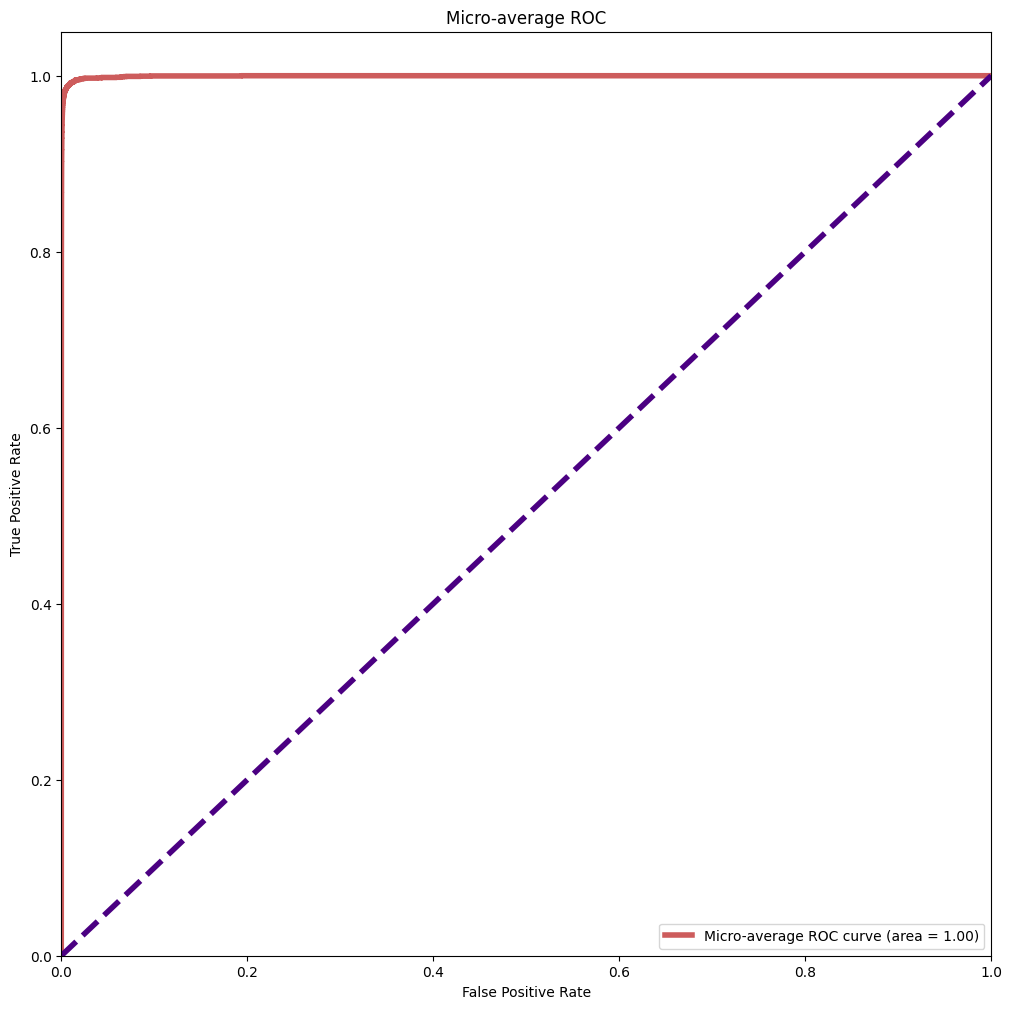

In [ ]:
y_test_bin_mlp = label_binarize(y_test, classes=np.unique(y))
n_classes_mlp = y_test_bin_rf.shape[1]

y_score_mlp = mlp.predict_proba(x_test)

fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes_dt):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test_bin_mlp[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

# Compute micro-average ROC curve and ROC area for SVM
fpr_mlp["micro"], tpr_mlp["micro"], _ = roc_curve(y_test_bin_mlp.ravel(), y_score_mlp.ravel())
roc_auc_mlp["micro"] = auc(fpr_mlp["micro"], tpr_mlp["micro"])

fig, ax = plt.subplots(figsize=(12,12))  # Create a single subplot

ax.plot(fpr_mlp["micro"], tpr_mlp["micro"], color='indianred', lw=4,
        label='Micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc_mlp["micro"]))
ax.plot([0, 1], [0, 1], color='indigo', lw=4, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Micro-average ROC')
ax.legend(loc="lower right")


'''
#indiv

fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Create a 6x5 grid of subplots
fig.suptitle("Decision Tree ROC Curves for Each Letter", fontsize=16)

# Plot individual letter ROC curves
for i, ax in enumerate(axes.ravel()):
    if i < n_classes_mlp:
        ax.plot(fpr_mlp[i], tpr_mlp[i], color='darkorange', lw=2,
                label='ROC curve (area = %0.2f)' % roc_auc_mlp[i])
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=9, labelpad=5)
        ax.set_ylabel('True Positive Rate', fontsize=9, labelpad=5)
        ax.set_title(f"Letter: {np.unique(y)[i]}")
        ax.legend(loc="lower right", fontsize=9)
        ax.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label size

    else:
        ax.axis('off')

plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)  # Adjust layout padding
plt.show()
'''

### cross validation


In [ ]:
# k-fold cross validation!

#random forest

from sklearn.model_selection import KFold
import copy

data_idx = np.arange(len(x_train))
kf = KFold(n_splits=5, shuffle=True)
best_score = -np.inf
best_model = copy.deepcopy(forest_model)

total = 5

for i in range(total):
  k = 0
  print("Attempt {}:".format(i))

  for train_idx, val_idx in kf.split(data_idx):
      x_train_fold = x_train.iloc[train_idx]
      y_train_fold = y_train.iloc[train_idx]
      x_val_fold = x_train.iloc[val_idx]
      y_val_fold = y_train.iloc[val_idx]

      forest_model.fit(x_train_fold, y_train_fold)
      rf_predictions = forest_model.predict(x_val_fold)
      score = accuracy_score(y_val_fold, rf_predictions)

      print("Accuracy in fold {}: {:.5f}".format(k, score))
      print()
      k = k + 1

      if score > best_score:
          best_model = copy.deepcopy(forest_model)
          best_score = score

  print("Best Accuracy:", best_score)
  print()

  forest_model = best_model

new_rf_predictions = best_model.predict(x_test)

print("Old Accuracy:", rf_accuracy)
print("New Accuracy:", accuracy_score(y_test, new_rf_predictions))
print()

#0.9603
#0.9631
#0.9641
#0.9628

Attempt 0:


KeyboardInterrupt: 

In [ ]:
# k-fold cross validation!

# mlp :(
'''
from sklearn.model_selection import KFold
import copy

data_idx = np.arange(len(x_train))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_score = -np.inf

total = 10

for i in range(total):
  k = 0
  print("Attempt {}:".format(i))

  for train_idx, val_idx in kf.split(data_idx):
      x_train_fold = x_train.iloc[train_idx]
      y_train_fold = y_train.iloc[train_idx]
      x_val_fold = x_train.iloc[val_idx]
      y_val_fold = y_train.iloc[val_idx]

      mlp.fit(x_train_fold, y_train_fold)
      mlp_predictions = mlp.predict(x_val_fold)
      score = accuracy_score(y_val_fold, mlp_predictions)

      print("RMSE in fold {}: {:.5f}".format(k, score))
      print()
      k = k + 1

      if score > best_score:
          best_model = copy.deepcopy(mlp)
          best_score = score

  print("Best Accuracy:", best_score)
  print()

  mlp = best_model
  #new_rf_predictions = best_model.predict(x_test)
  '''


### results

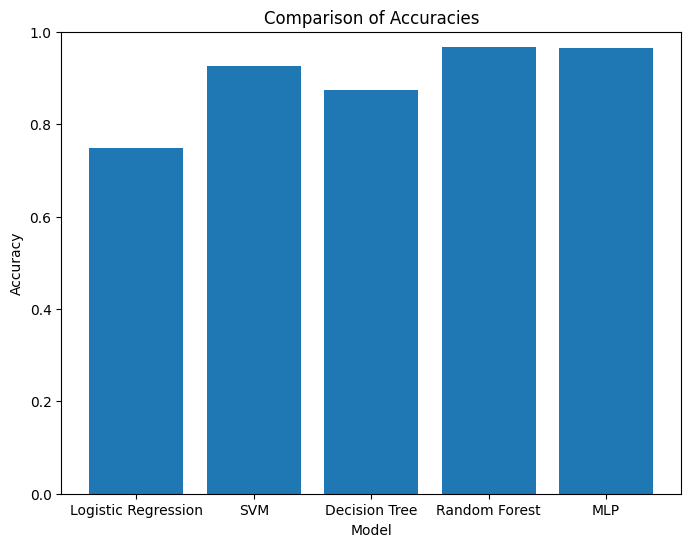

In [ ]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'MLP']
accuracies = [lr_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.ylim(0, 1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': lr_y_pred,
    'Decision Tree': dt_y_pred,
    'SVM': svm_y_pred,
    'Random Forest': rf_y_pred,
    'MLP': mlp_y_pred
}

letters = np.unique(y_test)  # Get all unique letters

for letter in letters:
    fig, axes = plt.subplots(1, 6, figsize=(15, 4))  # 5 columns now
    fig.suptitle(f"Predictions for Letter '{letter}'", fontsize=16)

    # Find an example of the actual letter in the test set
    actual_letter_index = np.where(y_test == letter)[0][0]
    actual_image = x_test.iloc[actual_letter_index, :].values.reshape(4, 4)

    # Plot the actual letter
    axes[0].imshow(actual_image, cmap='binary', interpolation='nearest')
    axes[0].set_title("Actual")
    axes[0].axis('off')

    # Plot model predictions
    for i, (model_name, y_pred) in enumerate(models.items()):
        letter_indices = np.where(y_pred == letter)[0]
        if len(letter_indices) > 0:
            example_image = x_test.iloc[letter_indices[0], :].values.reshape(4, 4)
            axes[i + 1].imshow(example_image, cmap='binary', interpolation='nearest')  # i + 1 for correct indexing
            axes[i + 1].set_title(model_name)
            axes[i + 1].axis('off')
        else:
            axes[i + 1].axis('off')
            print(f"No '{letter}' predictions found for {model_name}.")

    plt.tight_layout()
    plt.show()


### actual results 4 paper


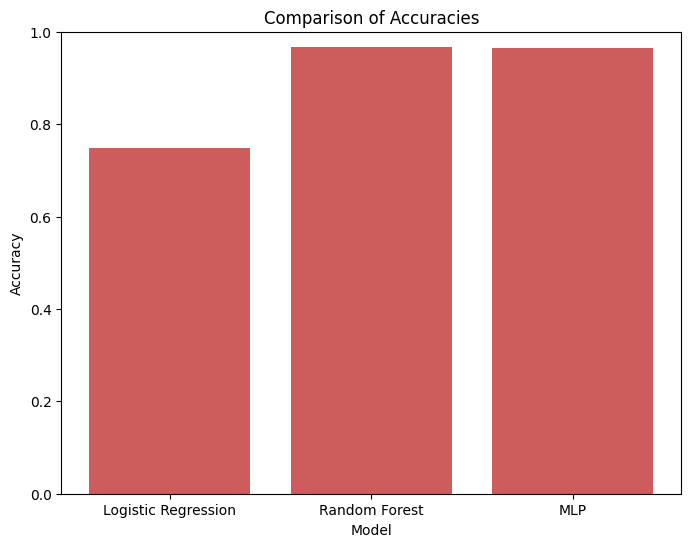

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'MLP']
accuracies = [lr_accuracy, rf_accuracy, mlp_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color = 'indianred')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.ylim(0, 1)
plt.show()

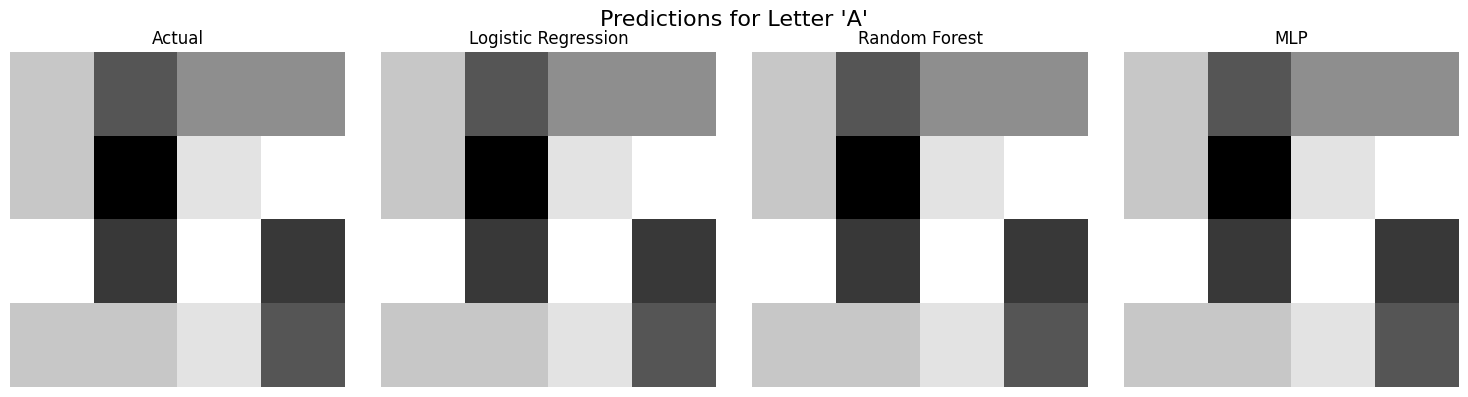

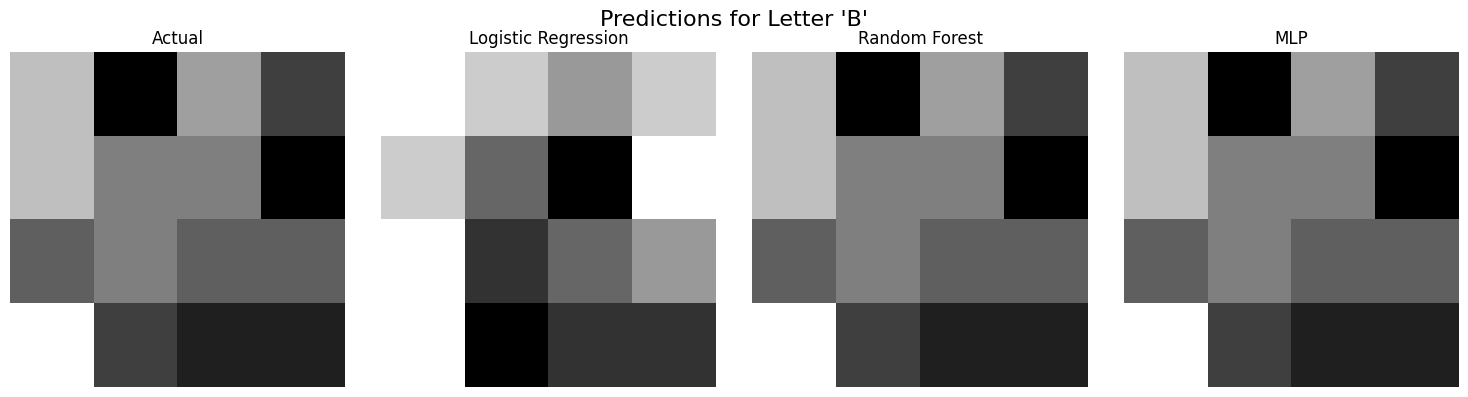

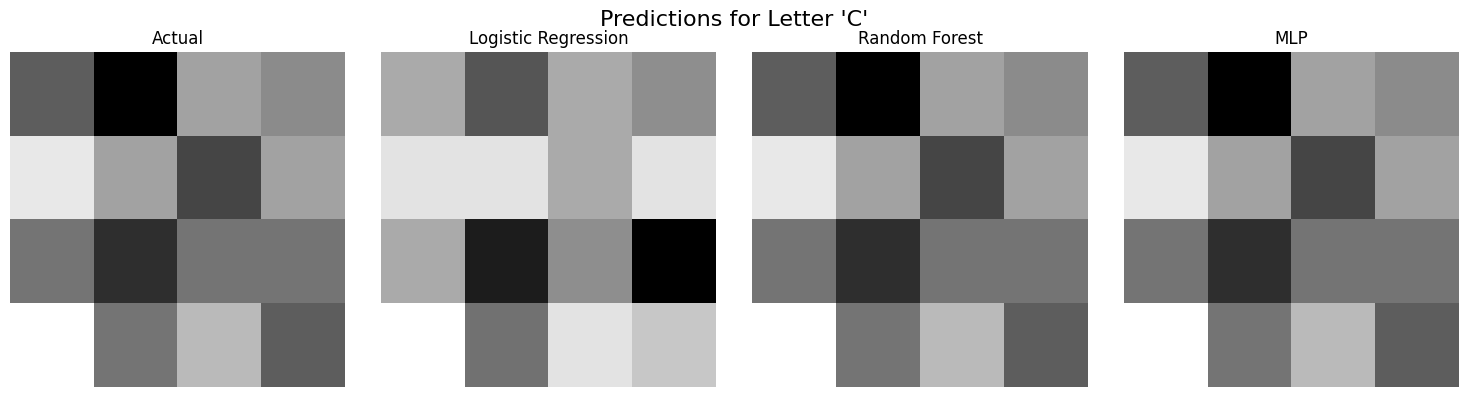

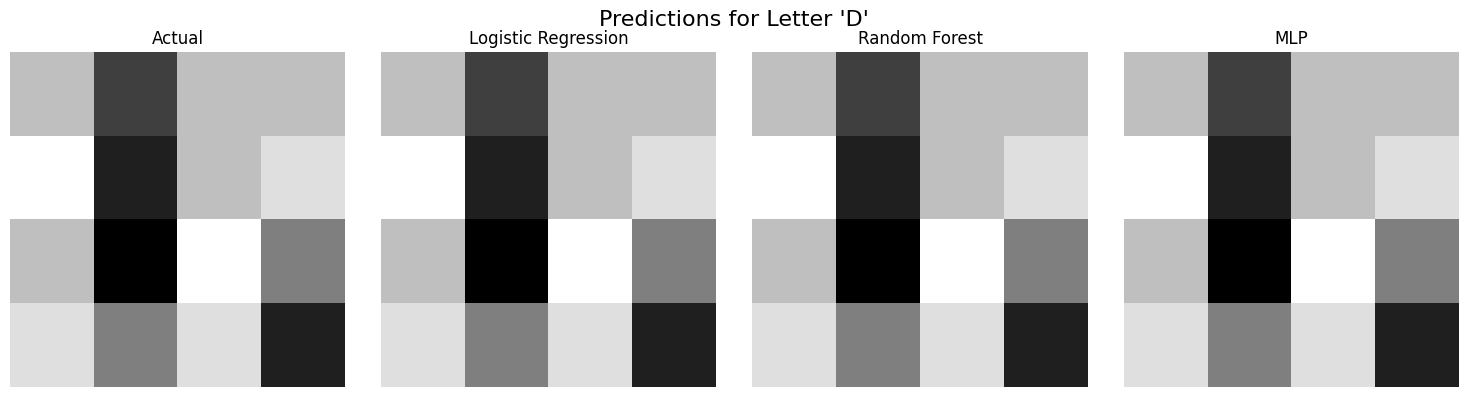

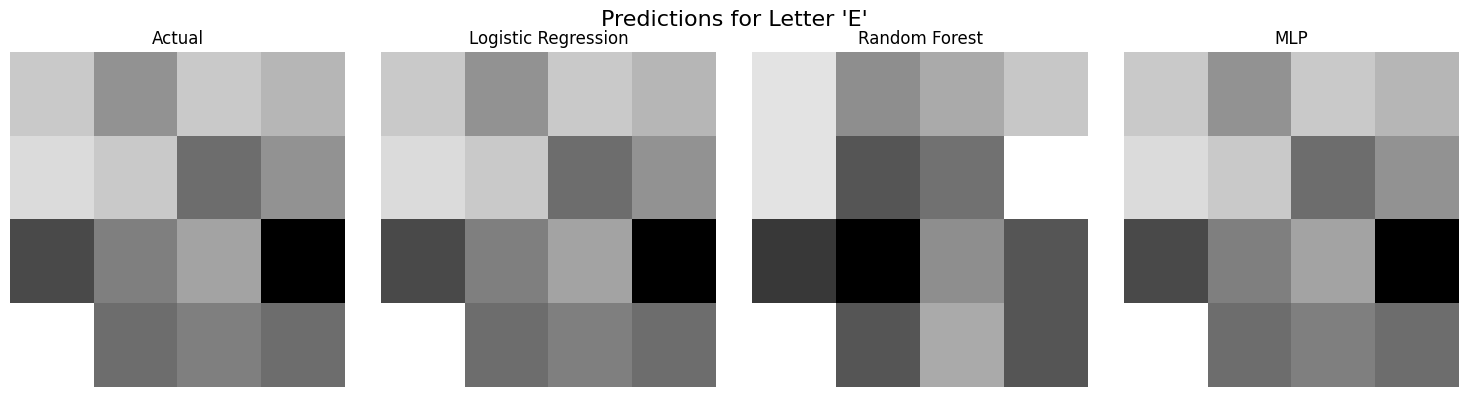

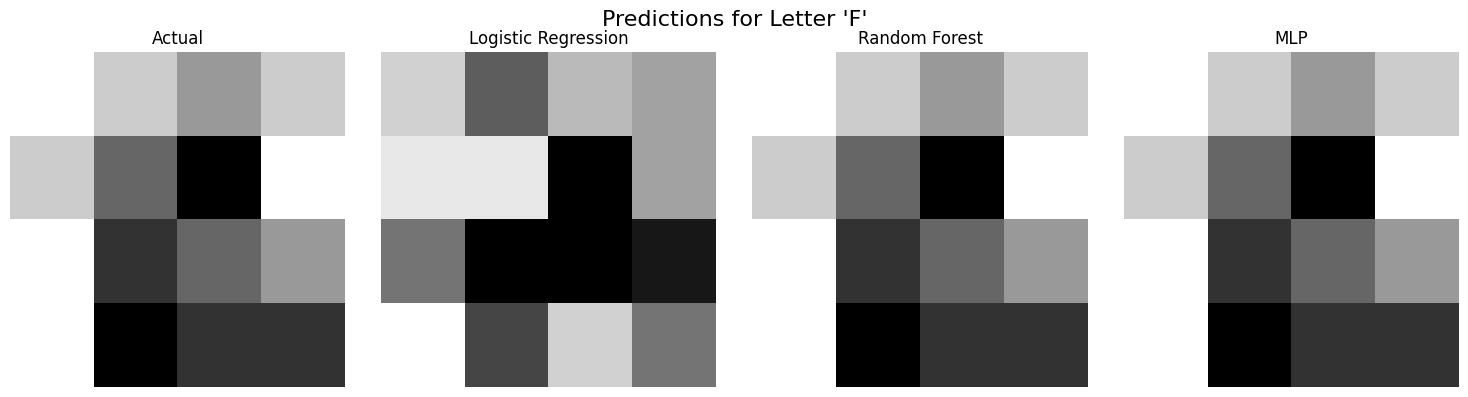

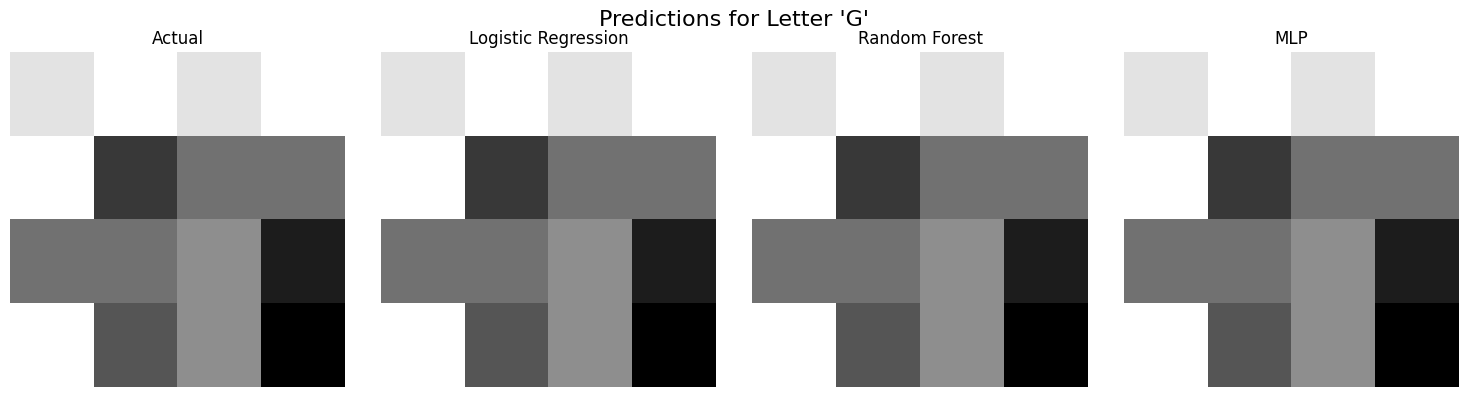

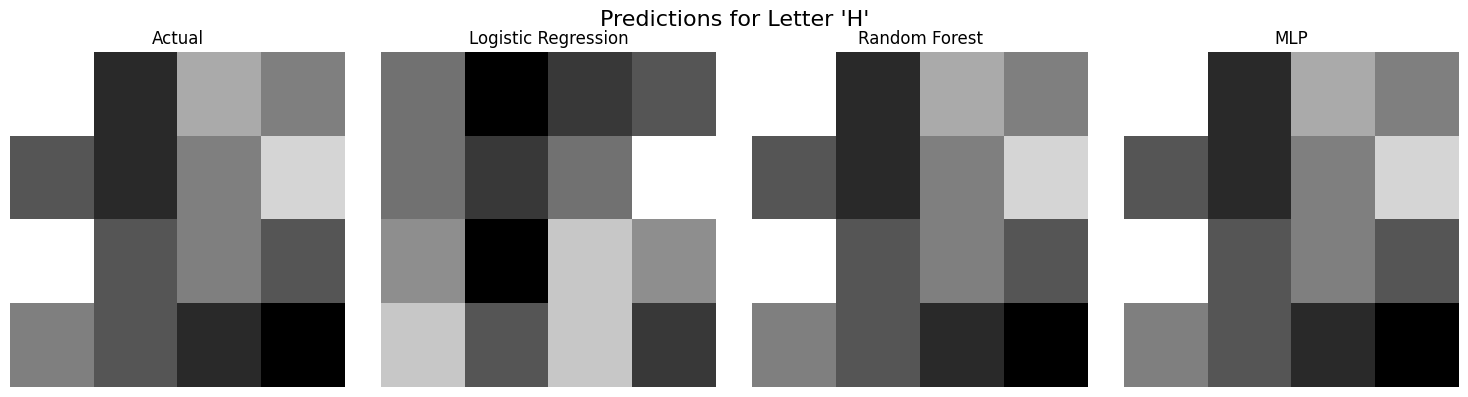

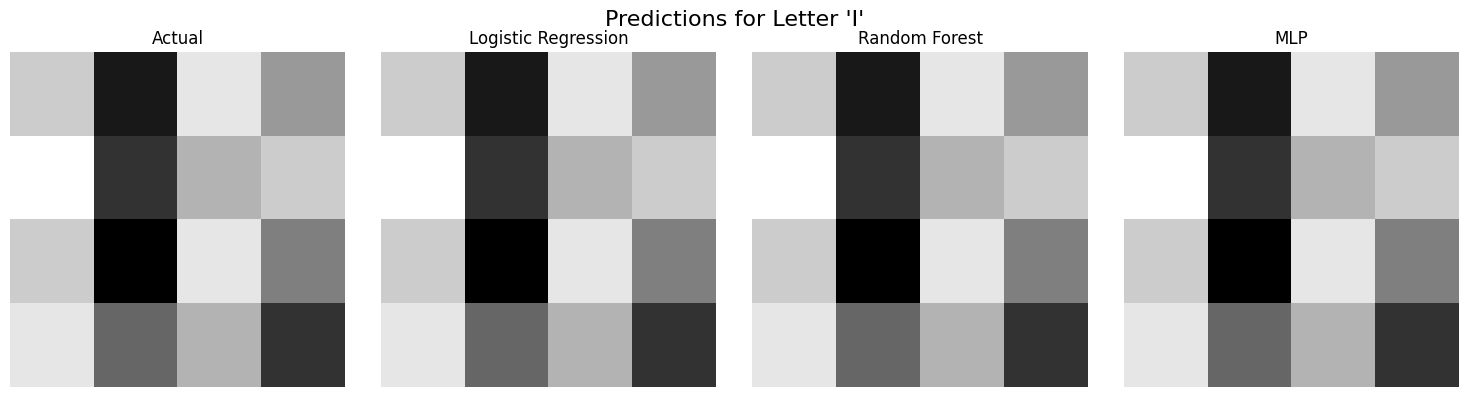

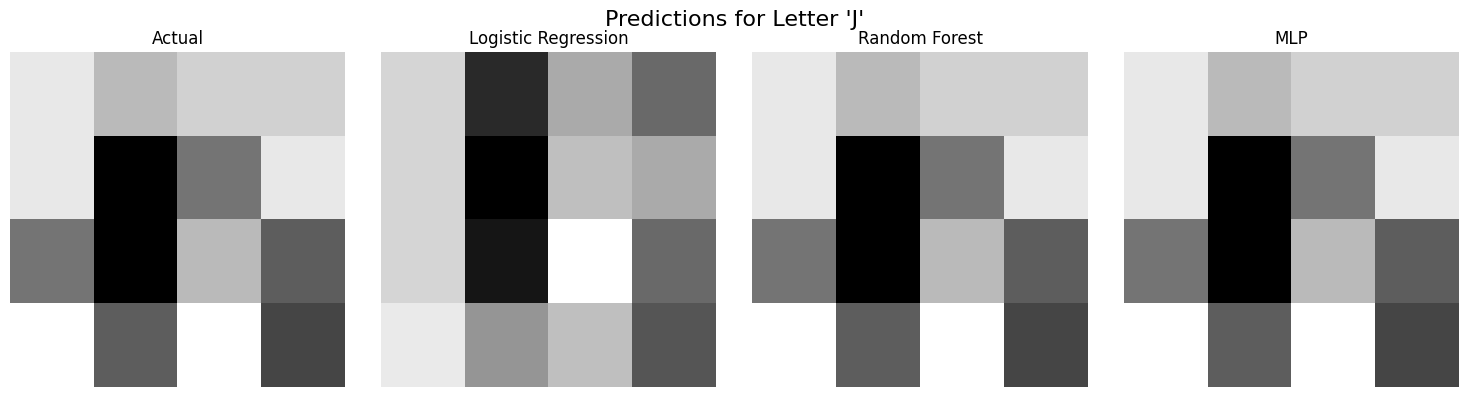

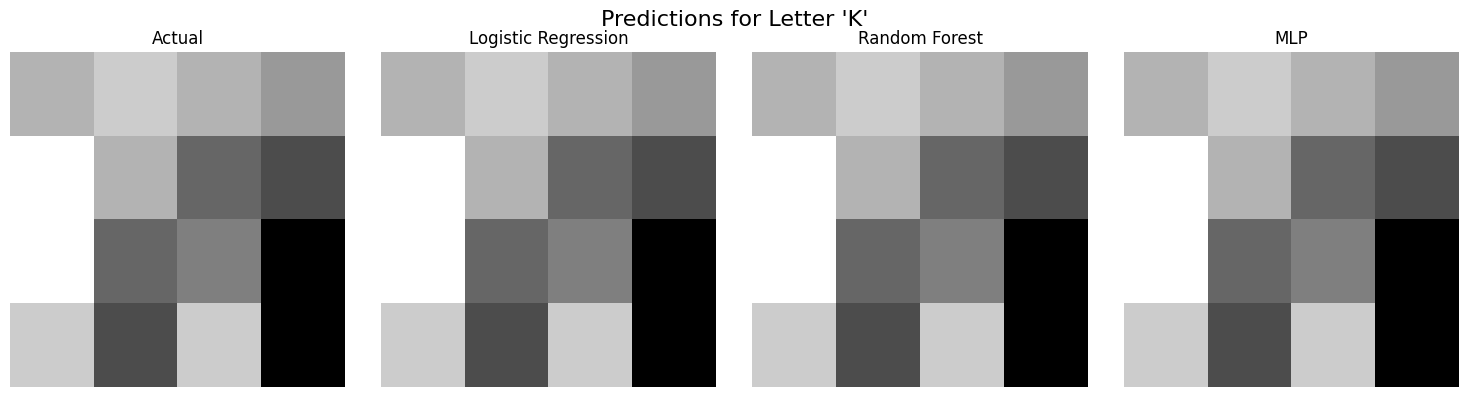

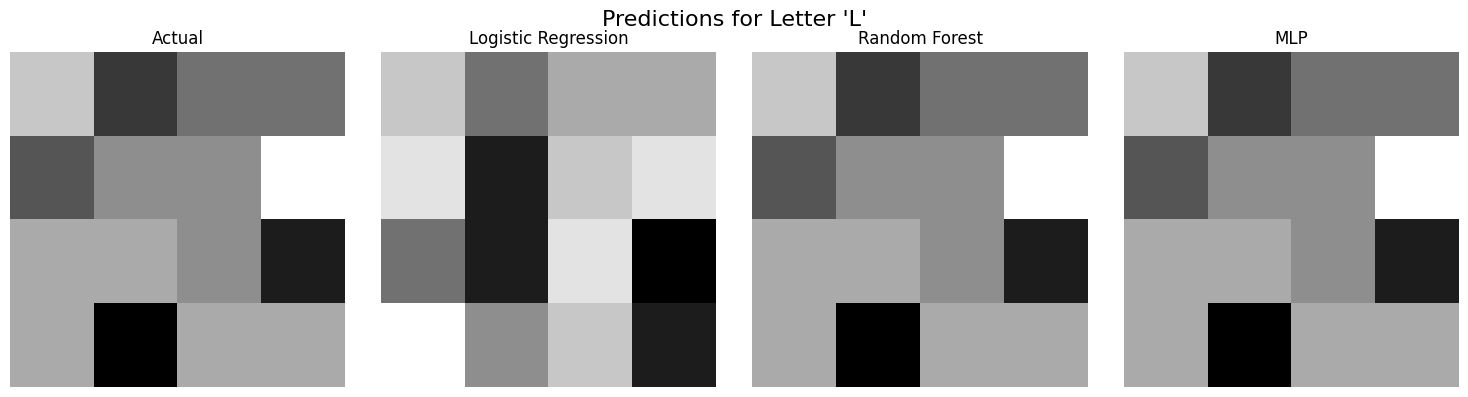

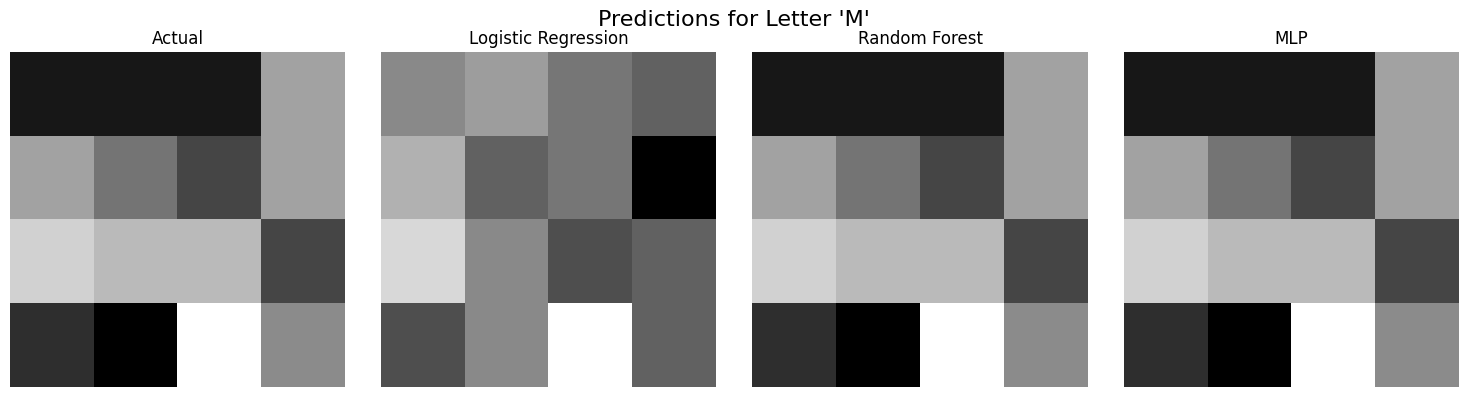

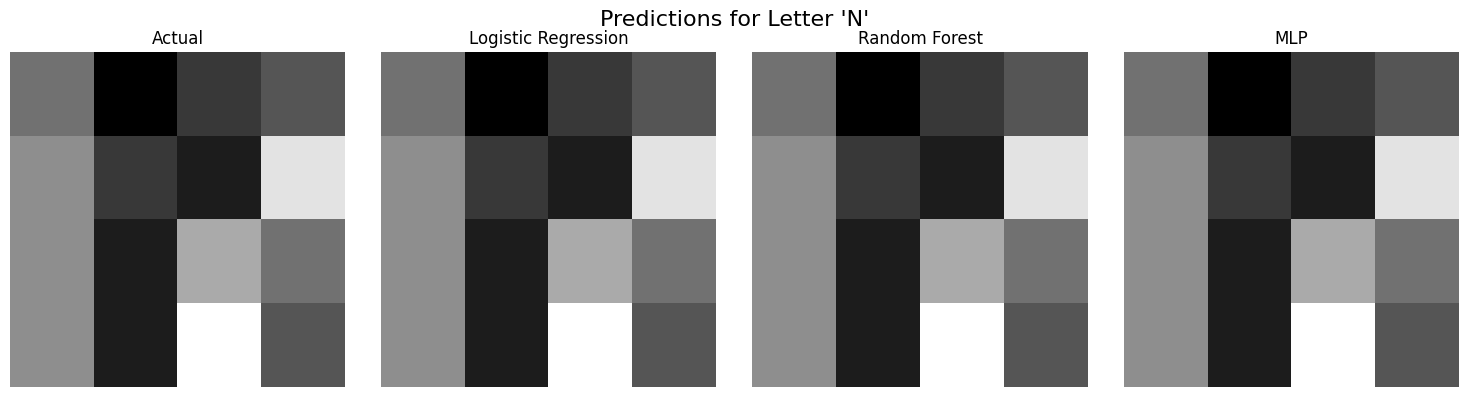

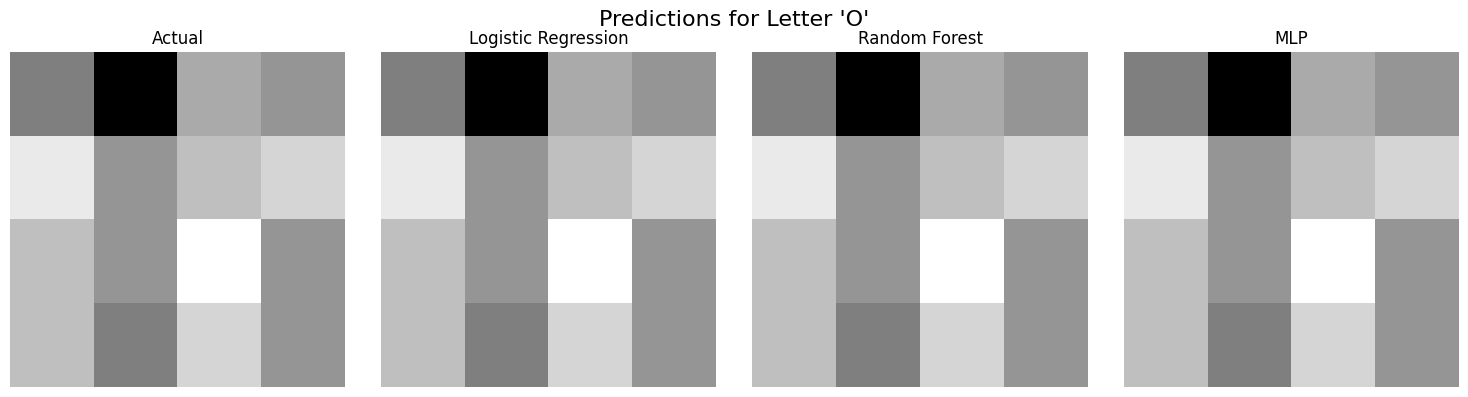

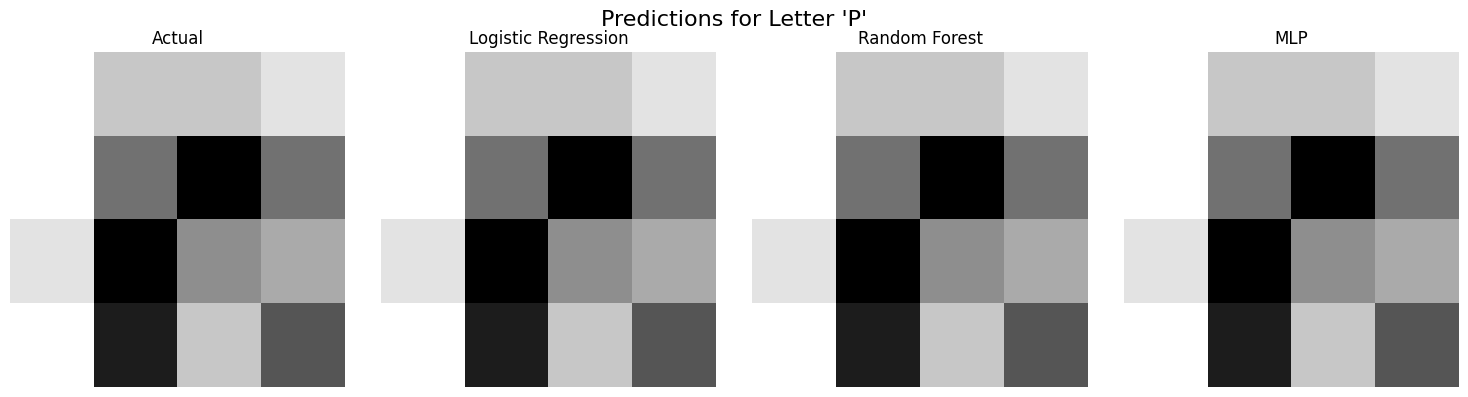

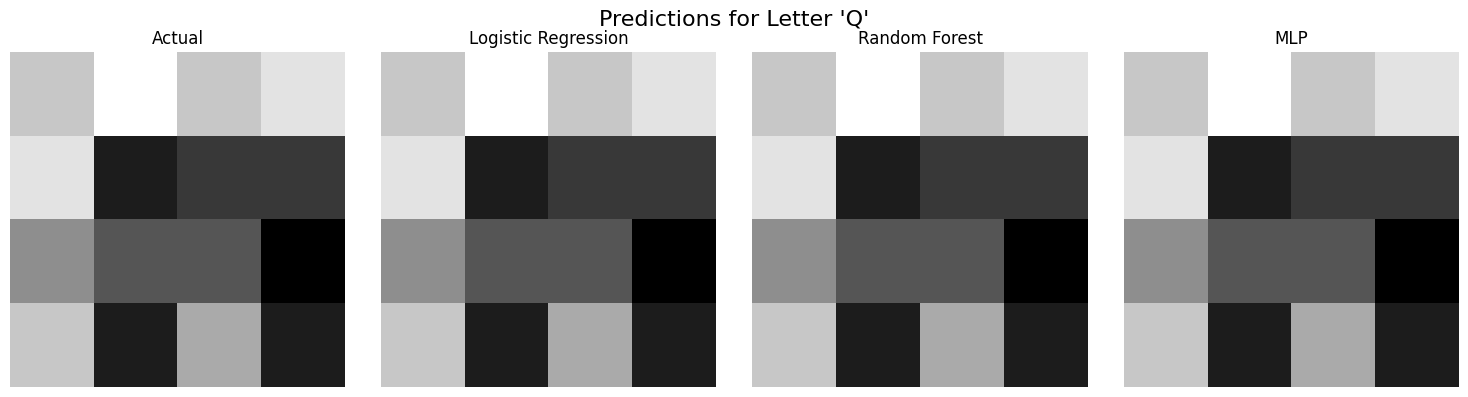

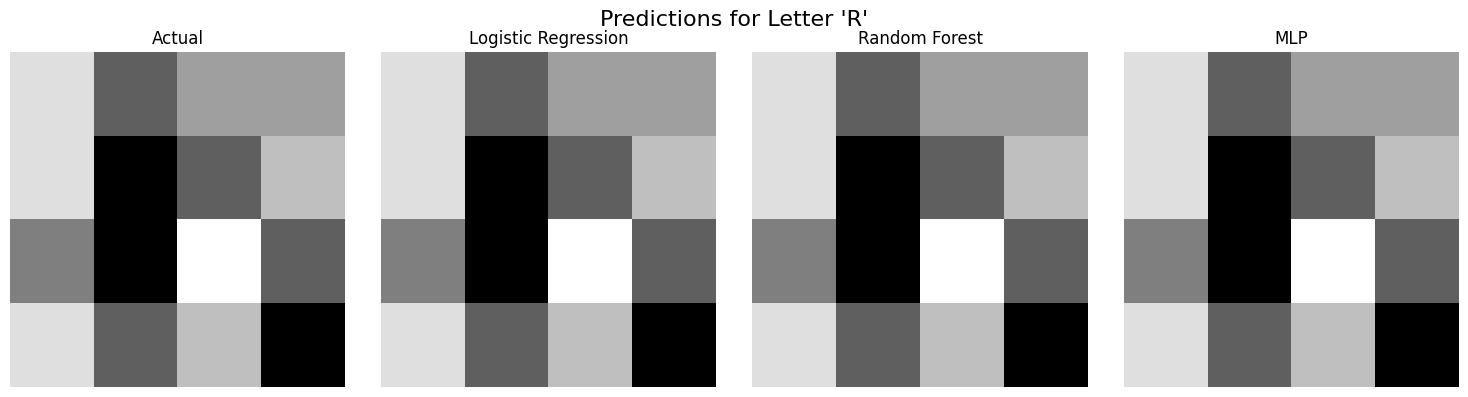

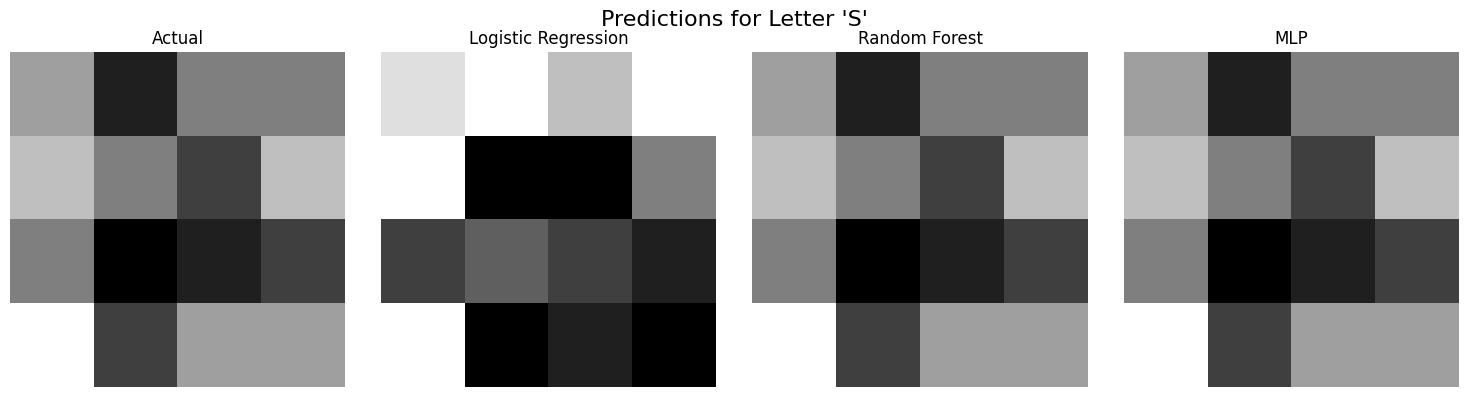

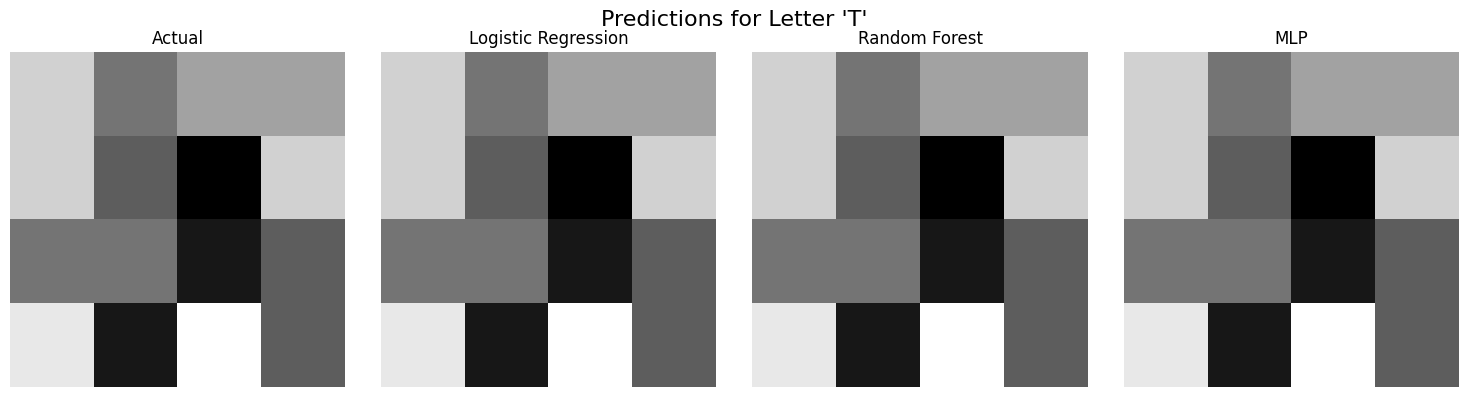

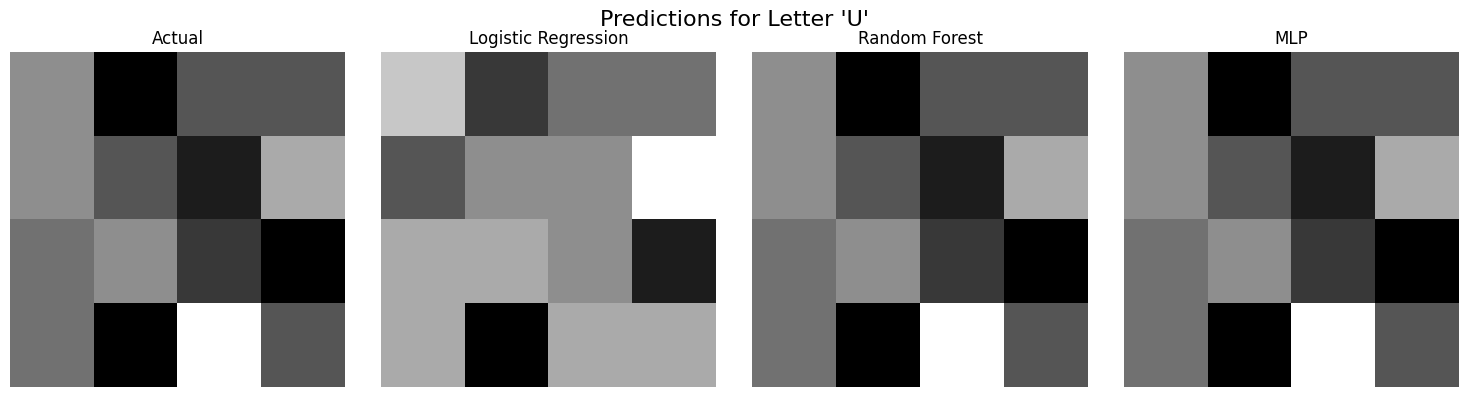

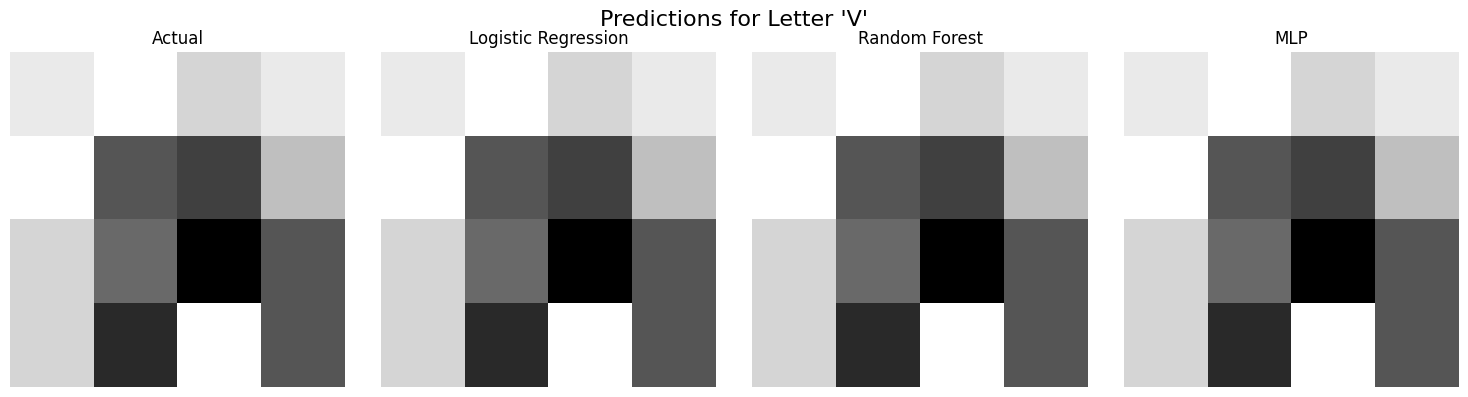

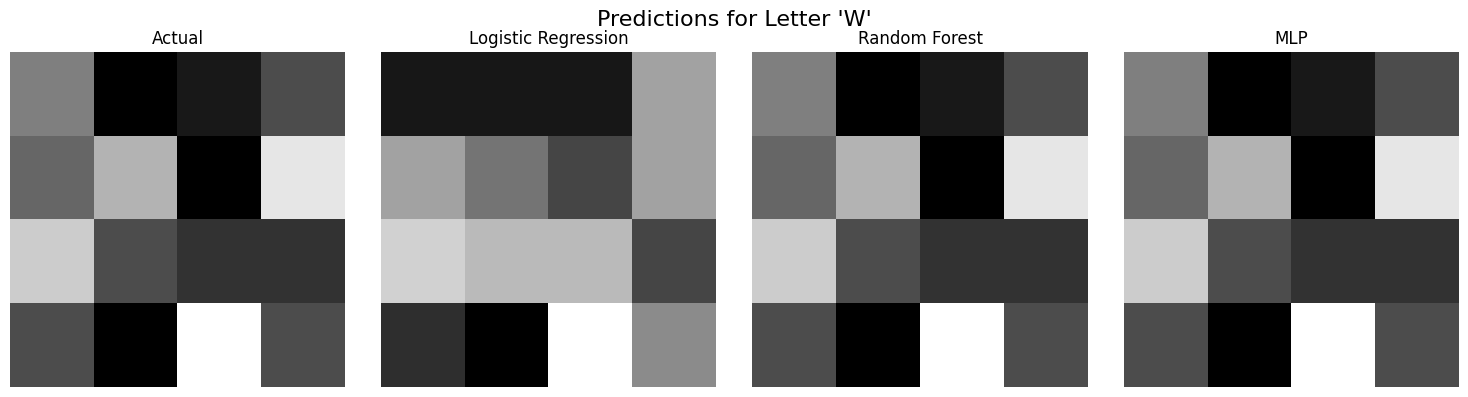

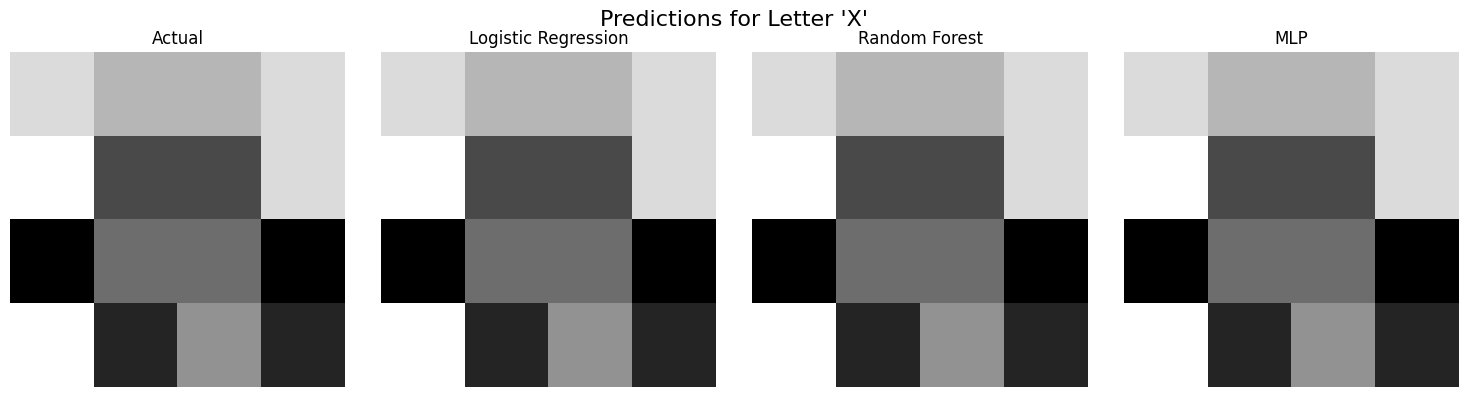

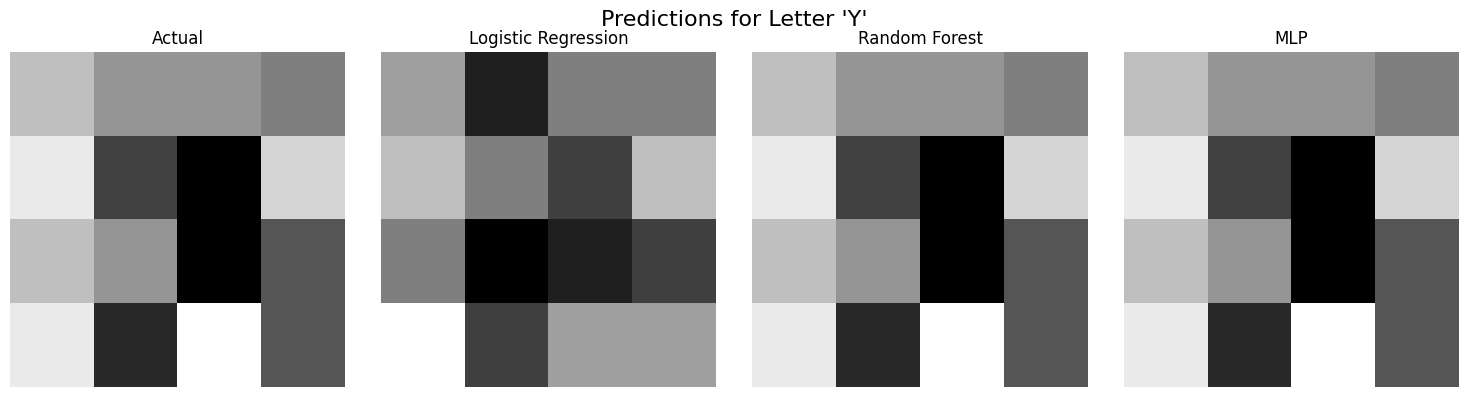

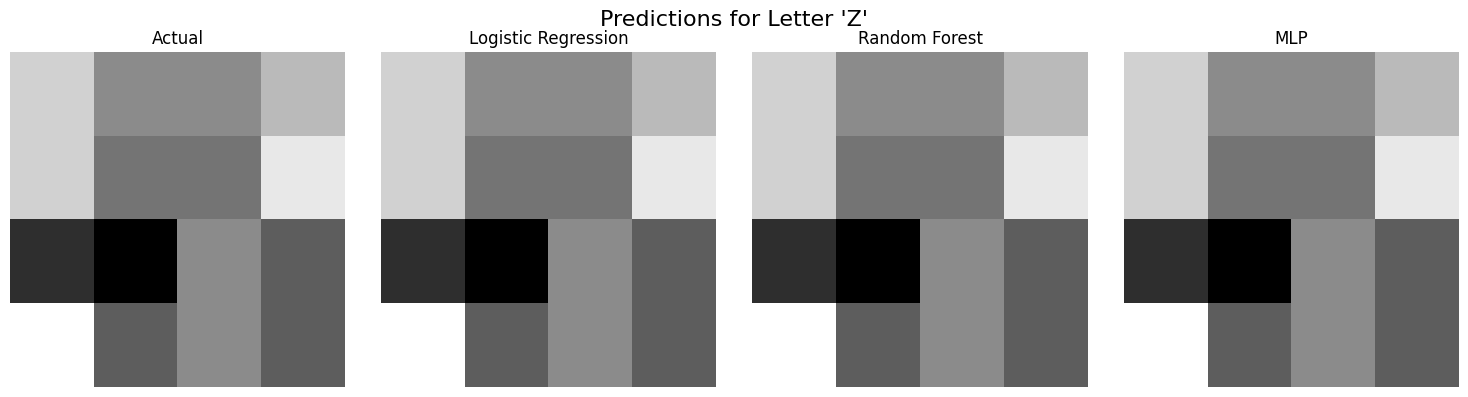

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': lr_y_pred,
    'Random Forest': rf_y_pred,
    'MLP': mlp_y_pred
}

letters = np.unique(y_test)  # Get all unique letters

for letter in letters:
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))  # 5 columns now
    fig.suptitle(f"Predictions for Letter '{letter}'", fontsize=16)

    # Find an example of the actual letter in the test set
    actual_letter_index = np.where(y_test == letter)[0][0]
    actual_image = x_test.iloc[actual_letter_index, :].values.reshape(4, 4)

    # Plot the actual letter
    axes[0].imshow(actual_image, cmap='binary', interpolation='nearest')
    axes[0].set_title("Actual")
    axes[0].axis('off')

    # Plot model predictions
    for i, (model_name, y_pred) in enumerate(models.items()):
        letter_indices = np.where(y_pred == letter)[0]
        if len(letter_indices) > 0:
            example_image = x_test.iloc[letter_indices[0], :].values.reshape(4, 4)
            axes[i + 1].imshow(example_image, cmap='binary', interpolation='nearest')  # i + 1 for correct indexing
            axes[i + 1].set_title(model_name)
            axes[i + 1].axis('off')
        else:
            axes[i + 1].axis('off')
            print(f"No '{letter}' predictions found for {model_name}.")

    plt.tight_layout()
    plt.show()